In [1]:
#installing necessary packages and libraries
!pip install seaborn
!pip install scikit-learn
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
file_1 = pd.read_csv('March2024_WeekOne_Part1.csv')
file_1.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
0,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-01 00:00:00.000,0.051,0.050,0.054,0.050,0.064,...,0.266,0.282,0.560,0.305,0.294,0.265,0.222,0.209,0.193,0.088
1,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-02 00:00:00.000,0.051,0.055,0.061,0.037,0.064,...,0.218,0.399,0.405,0.603,0.937,0.446,0.565,0.264,0.705,0.083
2,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-03 00:00:00.000,0.052,0.087,0.092,0.054,0.060,...,0.080,0.310,0.552,0.299,0.313,0.250,0.165,0.144,0.161,0.110
3,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-04 00:00:00.000,0.058,0.069,0.046,0.093,0.074,...,0.598,0.289,0.465,0.461,0.196,0.295,0.144,0.181,0.187,0.119
4,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-05 00:00:00.000,0.056,0.052,0.052,0.059,0.035,...,0.661,0.412,0.209,0.696,0.165,0.178,0.234,0.238,0.092,0.222


In [3]:
# Convert anonymisedMPRN column to string if necessary
file_1['AnonymisedMPRN'] = file_1['AnonymisedMPRN'].astype(str)

# Filter data for a specific anonymisedMPRN
specific_mprn = '10064959502'
filtered_data = file_1[file_1['AnonymisedMPRN'] == specific_mprn]

# Display the filtered data
print(filtered_data)

  AnonymisedMPRN                             Tariff  \
0    10064959502  SMTOU0006 - Smart 24 hour Replica   
1    10064959502  SMTOU0006 - Smart 24 hour Replica   
2    10064959502  SMTOU0006 - Smart 24 hour Replica   
3    10064959502  SMTOU0006 - Smart 24 hour Replica   
4    10064959502  SMTOU0006 - Smart 24 hour Replica   
5    10064959502  SMTOU0006 - Smart 24 hour Replica   
6    10064959502  SMTOU0006 - Smart 24 hour Replica   

                          Product Name  Product Code              ReadingDate  \
0  DF RET 12 Mth Mcc12 TOU 24 hour 10%          1743  2024-03-01 00:00:00.000   
1  DF RET 12 Mth Mcc12 TOU 24 hour 10%          1743  2024-03-02 00:00:00.000   
2  DF RET 12 Mth Mcc12 TOU 24 hour 10%          1743  2024-03-03 00:00:00.000   
3  DF RET 12 Mth Mcc12 TOU 24 hour 10%          1743  2024-03-04 00:00:00.000   
4  DF RET 12 Mth Mcc12 TOU 24 hour 10%          1743  2024-03-05 00:00:00.000   
5  DF RET 12 Mth Mcc12 TOU 24 hour 10%          1743  2024-03-06 00:00:00

In [4]:
# Load data
file_paths = ['March2024_WeekOne_Part1.csv', 'March2024_WeekOne_Part2.csv', 'March2024_WeekTwo_Part1.csv', 'March2024_WeekTwo_Part2.csv', 'March2024_WeekThree_Part1.csv','March2024_WeekThree_Part2.csv','March2024_WeekFour_Part1.csv','March2024_WeekFour_Part2.csv','March2024_WeekFive.csv']
all_data = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

len(all_data)

1303002

In [5]:
all_data.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
0,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-01 00:00:00.000,0.051,0.050,0.054,0.050,0.064,...,0.266,0.282,0.560,0.305,0.294,0.265,0.222,0.209,0.193,0.088
1,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-02 00:00:00.000,0.051,0.055,0.061,0.037,0.064,...,0.218,0.399,0.405,0.603,0.937,0.446,0.565,0.264,0.705,0.083
2,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-03 00:00:00.000,0.052,0.087,0.092,0.054,0.060,...,0.080,0.310,0.552,0.299,0.313,0.250,0.165,0.144,0.161,0.110
3,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-04 00:00:00.000,0.058,0.069,0.046,0.093,0.074,...,0.598,0.289,0.465,0.461,0.196,0.295,0.144,0.181,0.187,0.119
4,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-05 00:00:00.000,0.056,0.052,0.052,0.059,0.035,...,0.661,0.412,0.209,0.696,0.165,0.178,0.234,0.238,0.092,0.222


In [6]:
all_data.tail()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
1302997,10290796024,SMTOU0006 - Smart 24 hour Replica,ELE ACQ 12M COT MCC12 24 HR 19%,2333,2024-03-30 00:00:00.000,0.136,0.021,0.016,0.137,0.016,...,0.199,0.317,0.195,0.251,0.251,0.217,0.309,0.215,0.234,0.262
1302998,10290796024,SMTOU0006 - Smart 24 hour Replica,ELE ACQ 12M COT MCC12 24 HR 19%,2333,2024-03-31 00:00:00.000,0.039,0.141,NaN,NaN,0.040,...,0.124,0.361,0.214,0.199,0.295,0.197,0.274,0.212,0.186,0.189
1302999,10290846490,SMTOU0007 - EV TOU Duo,ELE ACQ 12Mths MCC12 EV Duo 15%.,1888,2024-03-29 00:00:00.000,0.007,0.007,0.006,0.007,1.874,...,0.007,0.006,0.006,0.006,0.009,0.005,0.007,0.006,0.006,0.006
1303000,10290846490,SMTOU0007 - EV TOU Duo,ELE ACQ 12Mths MCC12 EV Duo 15%.,1888,2024-03-30 00:00:00.000,0.007,0.006,0.007,0.008,2.205,...,0.006,0.007,0.006,0.006,0.007,0.006,0.022,0.007,0.007,0.007
1303001,10290846490,SMTOU0007 - EV TOU Duo,ELE ACQ 12Mths MCC12 EV Duo 15%.,1888,2024-03-31 00:00:00.000,0.006,0.006,NaN,NaN,0.007,...,0.006,0.008,0.010,0.007,0.009,0.007,0.008,0.007,0.007,0.006


In [7]:
# Convert Product Code column to string if necessary
all_data['Product Code'] = all_data['Product Code'].astype(str)

# Get unique product codes
unique_product_codes = all_data['Product Code'].unique()

# Print all unique product codes
print("All unique Product Codes:")
for code in unique_product_codes:
    print(code)

All unique Product Codes:
1743
1741
1890
1948
1512
1384
1670
1806
1582
1744
1742
1714
1786
1681
1798
1888
1682
1379
1889
1777
1804
1782
2242
2329
1705
1907
2241
1564
1783
1792
1835
1909
1382
1785
1837
2330
1378
1949
1584
2155
1794
1704
1395
2320
1911
1802
1820
1796
1862
2283
2295
1980
1225
1526
260
1539
1455
1834
1385
1795
1094
1821
1799
1375
2119
1586
2301
1836
2225
1525
2312
1900
1669
1524
456
1195
1568
2322
261
1865
2204
2036
1387
1716
1793
2249
1901
2331
1953
2156
576
613
1516
1727
2234
1910
1998
1550
2333
1188
1374
1773
1839
1036
1061
2186
2151
2290
2231
2321
2334
1955
2223
1861
2008
1059
262
1548
1947
1167
2296
2244
1194
1842
885
1954
652
1807
2289
457
651
2288
1616
1946
1771
2152
1728
1380
2298
1956
2182
1570
1677
1766
2087
263
1510
2174
1523
469
2239
2019
1902
2263
1841
2045
1988
1922
2029
2003
1505
1983
2299
1585
2319
2101
2059
2306
1572
1860
1583
1970
2073
1676
2297
2180
1095
575
700
1566
254
577
1383
2046
1645
2275
2115
2034
612
1459
1977
1386
1236
413
1838
1965
2135
1992
19

In [8]:
# Convert AnonymisedMPRN column to string if necessary
all_data['AnonymisedMPRN'] = all_data['AnonymisedMPRN'].astype(str)

# Count the number of unique AnonymisedMPRN values
num_unique_mprns = all_data['AnonymisedMPRN'].nunique()

print(f"Number of unique AnonymisedMPRN: {num_unique_mprns}")

Number of unique AnonymisedMPRN: 43699


In [9]:
# Count the number of unique Product Code values
num_unique_product_codes = all_data['Product Code'].nunique()

print(f"Number of unique Product Codes: {num_unique_product_codes}")

Number of unique Product Codes: 282


In [10]:
# Filter data for a specific anonymisedMPRN
specific_mprn = '10064959502'
f1 = all_data[all_data['AnonymisedMPRN'] == specific_mprn]

# Display the filtered data
print(f1)

        AnonymisedMPRN                             Tariff  \
0          10064959502  SMTOU0006 - Smart 24 hour Replica   
1          10064959502  SMTOU0006 - Smart 24 hour Replica   
2          10064959502  SMTOU0006 - Smart 24 hour Replica   
3          10064959502  SMTOU0006 - Smart 24 hour Replica   
4          10064959502  SMTOU0006 - Smart 24 hour Replica   
5          10064959502  SMTOU0006 - Smart 24 hour Replica   
6          10064959502  SMTOU0006 - Smart 24 hour Replica   
282389     10064959502  SMTOU0006 - Smart 24 hour Replica   
282390     10064959502  SMTOU0006 - Smart 24 hour Replica   
282391     10064959502  SMTOU0006 - Smart 24 hour Replica   
282392     10064959502  SMTOU0006 - Smart 24 hour Replica   
282393     10064959502  SMTOU0006 - Smart 24 hour Replica   
282394     10064959502  SMTOU0006 - Smart 24 hour Replica   
282395     10064959502  SMTOU0006 - Smart 24 hour Replica   
572649     10064959502  SMTOU0006 - Smart 24 hour Replica   
572650     10064959502  

In [11]:
# Filter data for a specific anonymisedMPRN
specific_mprn = '10290796024'
f2 = all_data[all_data['AnonymisedMPRN'] == specific_mprn]

# Display the filtered data
print(f2)

        AnonymisedMPRN                             Tariff  \
572639     10290796024  SMTOU0006 - Smart 24 hour Replica   
572640     10290796024  SMTOU0006 - Smart 24 hour Replica   
572641     10290796024  SMTOU0006 - Smart 24 hour Replica   
869218     10290796024  SMTOU0006 - Smart 24 hour Replica   
869219     10290796024  SMTOU0006 - Smart 24 hour Replica   
869220     10290796024  SMTOU0006 - Smart 24 hour Replica   
869221     10290796024  SMTOU0006 - Smart 24 hour Replica   
869222     10290796024  SMTOU0006 - Smart 24 hour Replica   
869223     10290796024  SMTOU0006 - Smart 24 hour Replica   
869224     10290796024  SMTOU0006 - Smart 24 hour Replica   
1171909    10290796024  SMTOU0006 - Smart 24 hour Replica   
1171910    10290796024  SMTOU0006 - Smart 24 hour Replica   
1171911    10290796024  SMTOU0006 - Smart 24 hour Replica   
1171912    10290796024  SMTOU0006 - Smart 24 hour Replica   
1171913    10290796024  SMTOU0006 - Smart 24 hour Replica   
1171914    10290796024  

In [12]:
# Convert ReadingDate column to datetime
all_data['ReadingDate'] = pd.to_datetime(all_data['ReadingDate'])

# Calculate expected number of days (31 days assuming full month)
expected_days = 31

# Group by AnonymisedMPRN and count unique ReadingDate values
mprn_date_counts = all_data.groupby('AnonymisedMPRN')['ReadingDate'].nunique().reset_index()

# Rename columns for clarity
mprn_date_counts.columns = ['AnonymisedMPRN', 'Unique Date Count']

# Count how many AnonymisedMPRN have exactly 31 days and how many have fewer
mprns_with_31_days = mprn_date_counts[mprn_date_counts['Unique Date Count'] == expected_days]
mprns_without_31_days = mprn_date_counts[mprn_date_counts['Unique Date Count'] < expected_days]

# Count number of each category
num_mprns_with_31_days = len(mprns_with_31_days)
num_mprns_without_31_days = len(mprns_without_31_days)

# Display the results
print(f"Number of AnonymisedMPRN with exactly {expected_days} days of data: {num_mprns_with_31_days}")
print(f"Number of AnonymisedMPRN without {expected_days} days of data: {num_mprns_without_31_days}")

# Optionally, print the number of days each AnonymisedMPRN without 31 days has
if num_mprns_without_31_days > 0:
    print("\nNumber of days for AnonymisedMPRN without 31 days of data:")
    for index, row in mprns_without_31_days.iterrows():
        print(f"AnonymisedMPRN: {row['AnonymisedMPRN']}, Number of Days: {row['Unique Date Count']}")

Number of AnonymisedMPRN with exactly 31 days of data: 39966
Number of AnonymisedMPRN without 31 days of data: 3733

Number of days for AnonymisedMPRN without 31 days of data:
AnonymisedMPRN: 10039653422, Number of Days: 7
AnonymisedMPRN: 10039858997, Number of Days: 12
AnonymisedMPRN: 10039898658, Number of Days: 17
AnonymisedMPRN: 10039903403, Number of Days: 26
AnonymisedMPRN: 10039926208, Number of Days: 5
AnonymisedMPRN: 10039927568, Number of Days: 20
AnonymisedMPRN: 10039932928, Number of Days: 27
AnonymisedMPRN: 10039959206, Number of Days: 18
AnonymisedMPRN: 10039976470, Number of Days: 10
AnonymisedMPRN: 10040116270, Number of Days: 24
AnonymisedMPRN: 10040119801, Number of Days: 17
AnonymisedMPRN: 10040142084, Number of Days: 7
AnonymisedMPRN: 10040146677, Number of Days: 24
AnonymisedMPRN: 10040258080, Number of Days: 24
AnonymisedMPRN: 10040268708, Number of Days: 10
AnonymisedMPRN: 10040270232, Number of Days: 28
AnonymisedMPRN: 10040274541, Number of Days: 28
AnonymisedM

In [13]:
# Add a column day to all_data DataFrame 
# Convert ReadingDate to datetime
all_data['ReadingDate'] = pd.to_datetime(all_data['ReadingDate'])

# Add a column 'day' to extract the day of the week from ReadingDate
# The day names will be in English by default
all_data['day'] = all_data['ReadingDate'].dt.day_name()

# Display the updated DataFrame with the new 'day' column
all_data.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,day
0,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-01,0.051,0.050,0.054,0.050,0.064,...,0.282,0.560,0.305,0.294,0.265,0.222,0.209,0.193,0.088,Friday
1,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-02,0.051,0.055,0.061,0.037,0.064,...,0.399,0.405,0.603,0.937,0.446,0.565,0.264,0.705,0.083,Saturday
2,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-03,0.052,0.087,0.092,0.054,0.060,...,0.310,0.552,0.299,0.313,0.250,0.165,0.144,0.161,0.110,Sunday
3,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-04,0.058,0.069,0.046,0.093,0.074,...,0.289,0.465,0.461,0.196,0.295,0.144,0.181,0.187,0.119,Monday
4,10064959502,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-05,0.056,0.052,0.052,0.059,0.035,...,0.412,0.209,0.696,0.165,0.178,0.234,0.238,0.092,0.222,Tuesday


In [14]:
# Identify the different types of tariffs based on number of rows
if 'Tariff' in all_data.columns:
    # Get unique tariffs and their counts
    tariff_counts = all_data['Tariff'].value_counts()
    
    # Print the results
    print("Different types of tariffs and their counts:\n", tariff_counts)
else:
    print("The 'Tariff' column is not present in the data.")

Different types of tariffs and their counts:
 Tariff
SMTOU0006 - Smart 24 hour Replica                732045
SMTOU0001 - Default TOU MCC12                    416401
SMTOU0007 - EV TOU Duo                           121336
SMTOU0009 - Day Night Rate MCC12                  26803
SMTOU0002 - Electric Car rate group                3627
SMTOU0003 - Electric Car rate group Dual fuel      1457
SMSTD0001 - Variable MCC16                         1302
LGYEG0002 - Variable Base Rates                      31
Name: count, dtype: int64


In [15]:
# Identify the different types of tariffs based on AnonymisedMPRN
if 'Tariff' in all_data.columns and 'AnonymisedMPRN' in all_data.columns:
    # Group by 'Tariff' and count the unique 'AnonymisedMPRN'
    tariff_counts = all_data.groupby('Tariff')['AnonymisedMPRN'].nunique()

    # Print the results
    print("Counts of unique AnonymisedMPRN for each Tariff:\n", tariff_counts)
else:
    print("The 'Tariff' or 'AnonymisedMPRN' column is not present in the data.")

Counts of unique AnonymisedMPRN for each Tariff:
 Tariff
LGYEG0002 - Variable Base Rates                      1
SMSTD0001 - Variable MCC16                          42
SMTOU0001 - Default TOU MCC12                    13847
SMTOU0002 - Electric Car rate group                117
SMTOU0003 - Electric Car rate group Dual fuel       47
SMTOU0006 - Smart 24 hour Replica                24579
SMTOU0007 - EV TOU Duo                            4109
SMTOU0009 - Day Night Rate MCC12                   957
Name: AnonymisedMPRN, dtype: int64


In [16]:
# Check for duplicate rows
duplicate_rows = all_data.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 0


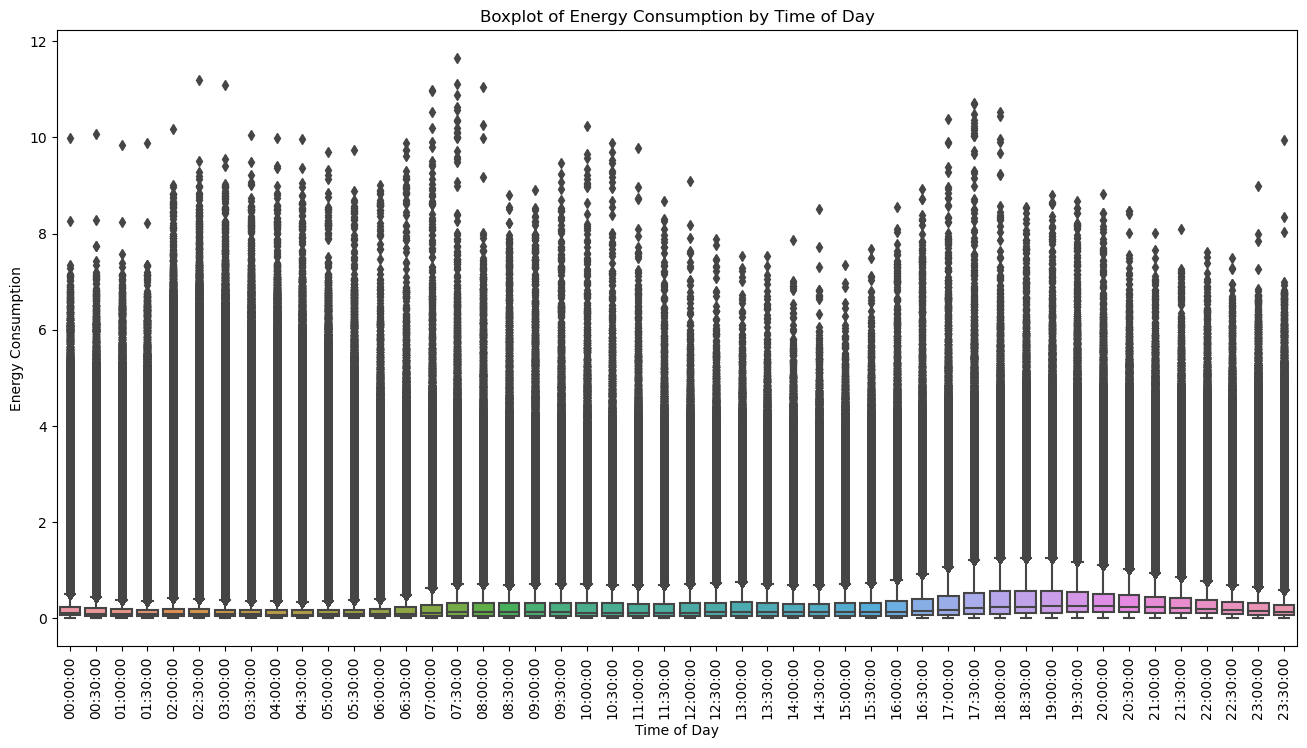

In [17]:
#Creating boxplots
# Convert time columns to numeric types
time_columns = all_data.columns[5:-1] 

# Ensure numeric data types for time columns
for column in time_columns:
    all_data[column] = pd.to_numeric(all_data[column], errors='coerce')
    
# # Check data types
# print(all_data.dtypes)

# Create a cleaned DataFrame for plotting
cleaned_data = all_data.dropna(subset=time_columns)

# Create a melted DataFrame for plotting
melted_data = pd.melt(cleaned_data, id_vars=['ReadingDate', 'day'], value_vars=time_columns, 
                      var_name='Time', value_name='Value')

# Ensure 'Value' column is numeric in the melted DataFrame
melted_data['Value'] = pd.to_numeric(melted_data['Value'], errors='coerce')

# Create a boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x='Time', y='Value', data=melted_data)
plt.xticks(rotation=90)
plt.title('Boxplot of Energy Consumption by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Energy Consumption')
plt.show()

In [18]:
# # Create a combined column
# all_data['Combined'] = all_data.apply(lambda row: f"{row['AnonymisedMPRN']}_{row['ReadingDate'].date()}_{row['day']}", axis=1)

# # Drop rows with NaN values in the time columns for the purpose of plotting
# cleaned_data = all_data.dropna(subset=time_columns)

# # Create a temporary melted DataFrame for plotting
# melted_data = pd.melt(cleaned_data, id_vars=['AnonymisedMPRN', 'ReadingDate', 'day', 'Combined'], 
#                       value_vars=time_columns, var_name='Time', value_name='Value')

# # Ensure 'Value' column is numeric
# melted_data['Value'] = pd.to_numeric(melted_data['Value'], errors='coerce')

# # Create a boxplot with the combined identifier
# plt.figure(figsize=(16, 8))
# sns.boxplot(x='Time', y='Value', hue='Combined', data=melted_data)
# plt.xticks(rotation=90)
# plt.title('Boxplot of Energy Consumption by Time of Day with Combined Identifier')
# plt.xlabel('Time of Day')
# plt.ylabel('Energy Consumption')
# plt.legend(title='Combined Identifier', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [19]:
# # Convert time columns to numeric types
# time_columns = all_data.columns[5:-1]  

# for column in time_columns:
#     all_data[column] = pd.to_numeric(all_data[column], errors='coerce')

# # Drop rows with NaN values in the time columns for the purpose of plotting
# cleaned_data = all_data.dropna(subset=time_columns)

# # Create a temporary melted DataFrame for plotting
# melted_data = pd.melt(cleaned_data, id_vars=['AnonymisedMPRN', 'ReadingDate', 'day'], 
#                       value_vars=time_columns, var_name='Time', value_name='Value')

# # Ensure 'Value' column is numeric
# melted_data['Value'] = pd.to_numeric(melted_data['Value'], errors='coerce')

# # Create a boxplot for each day separately
# unique_days = melted_data['day'].unique()

# for day in unique_days:
#     plt.figure(figsize=(16, 8))
#     sns.boxplot(x='Time', y='Value', hue='AnonymisedMPRN', data=melted_data[melted_data['day'] == day])
#     plt.xticks(rotation=90)
#     plt.title(f'Boxplot of Energy Consumption by Time of Day - Day {day}')
#     plt.xlabel('Time of Day')
#     plt.ylabel('Energy Consumption')
#     plt.legend(title='AnonymisedMPRN', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

In [20]:
# Sort all_data based on AnonymisedMPRN and ReadingDate
all_data_sorted = all_data.sort_values(by=['AnonymisedMPRN', 'ReadingDate'])
all_data_sorted.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,day
189623,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-01,0.1990,2.1035,3.6705,3.6295,3.6060,...,0.2005,0.8000,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070,Friday
189624,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-02,2.3175,3.6695,3.6485,1.9750,0.2550,...,0.2930,0.3095,0.2980,0.3435,0.3805,0.2440,0.2245,0.2075,0.2235,Saturday
189625,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-03,3.5440,3.8125,3.6915,3.2670,0.7600,...,0.7285,0.5010,0.4615,0.6085,0.3050,0.1675,0.1765,0.5400,3.5095,Sunday
189626,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-04,3.6715,3.6755,1.3130,0.1725,0.0570,...,0.6535,0.4400,0.1940,0.1315,0.5420,3.6115,3.6620,3.6845,2.6700,Monday
189627,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-05,0.3405,0.0380,0.0730,0.0410,0.0385,...,0.1035,0.0750,0.0765,0.0810,0.0955,0.0980,0.0820,0.0910,0.0770,Tuesday


## MISSING VALUES


In [21]:
# group the data by AnonymisedMPRN
# Check for missing values in the dataset
missing_values_by_mprn = all_data.groupby('AnonymisedMPRN').apply(lambda x: x.isnull().sum().sum()).reset_index()

# Rename columns for clarity
missing_values_by_mprn.columns = ['AnonymisedMPRN', 'Missing Values Count']

# Display the results
print(missing_values_by_mprn)

      AnonymisedMPRN  Missing Values Count
0        10039345597                     2
1        10039346713                     2
2        10039653422                     2
3        10039742582                     2
4        10039745168                     2
...              ...                   ...
43694    10303304469                     2
43695    10303305562                     2
43696    10303305582                     2
43697    10303305829                     2
43698    10303306996                     2

[43699 rows x 2 columns]


In [22]:
# Missing values Columns
# Check for missing values in each column
missing_values = all_data.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and their counts
print("Columns with missing values and their counts:")
print(columns_with_missing_values)

Columns with missing values and their counts:
01:00:00    43693
01:30:00    43693
dtype: int64


In [23]:
# Check for missing values in each column
missing_values = all_data_sorted.isnull().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display the columns with missing values and their counts
print("Columns with missing values and their counts:")
print(columns_with_missing_values)

# display rows with missing values for those columns
rows_with_missing_values = all_data_sorted[columns_with_missing_values.index].isnull().any(axis=1)
missing_values_data = all_data_sorted[rows_with_missing_values]

print("\nRows with missing values in any of the columns with missing data:")
print(missing_values_data)

Columns with missing values and their counts:
01:00:00    43693
01:30:00    43693
dtype: int64

Rows with missing values in any of the columns with missing data:
        AnonymisedMPRN                             Tariff  \
1259801    10039345597      SMTOU0001 - Default TOU MCC12   
1259804    10039346713      SMTOU0001 - Default TOU MCC12   
1260344    10039653422   SMTOU0009 - Day Night Rate MCC12   
1260338    10039742582             SMTOU0007 - EV TOU Duo   
1260329    10039745168  SMTOU0006 - Smart 24 hour Replica   
...                ...                                ...   
1264331    10303304469  SMTOU0006 - Smart 24 hour Replica   
1264337    10303305562  SMTOU0006 - Smart 24 hour Replica   
1264334    10303305582      SMTOU0001 - Default TOU MCC12   
1264325    10303305829             SMTOU0007 - EV TOU Duo   
1264328    10303306996  SMTOU0006 - Smart 24 hour Replica   

                                    Product Name Product Code ReadingDate  \
1259801                ELE M

In [24]:
# Display unique AnonymizedMPRN's that have missing values
unique_missing_anonymisedMPRNs = missing_values_data['AnonymisedMPRN'].unique()
unique_missing_anonymisedMPRN_count = missing_values_data['AnonymisedMPRN'].nunique()
print(f"Number of unique AnonymisedMPRN values with missing values: {unique_missing_anonymisedMPRN_count}")

print("\nUnique AnonymisedMPRN's with missing values:")
print(unique_missing_anonymisedMPRNs)

# Display details of these unique AnonymisedMPRNs
details_missing_anonymisedMPRNs = all_data_sorted[all_data_sorted['AnonymisedMPRN'].isin(unique_missing_anonymisedMPRNs)]

print("\nDetails of rows with these AnonymisedMPRNs:")
print(details_missing_anonymisedMPRNs)

Number of unique AnonymisedMPRN values with missing values: 43692

Unique AnonymisedMPRN's with missing values:
['10039345597' '10039346713' '10039653422' ... '10303305582' '10303305829'
 '10303306996']

Details of rows with these AnonymisedMPRNs:
        AnonymisedMPRN                             Tariff  \
189623     10039345597      SMTOU0001 - Default TOU MCC12   
189624     10039345597      SMTOU0001 - Default TOU MCC12   
189625     10039345597      SMTOU0001 - Default TOU MCC12   
189626     10039345597      SMTOU0001 - Default TOU MCC12   
189627     10039345597      SMTOU0001 - Default TOU MCC12   
...                ...                                ...   
1082697    10303306996  SMTOU0006 - Smart 24 hour Replica   
1082698    10303306996  SMTOU0006 - Smart 24 hour Replica   
1264326    10303306996  SMTOU0006 - Smart 24 hour Replica   
1264327    10303306996  SMTOU0006 - Smart 24 hour Replica   
1264328    10303306996  SMTOU0006 - Smart 24 hour Replica   

                   

In [25]:
# Display columns '01:00:00' and '01:30:00'
columns_to_display = ['AnonymisedMPRN','ReadingDate','01:00:00', '01:30:00']
selected_columns = all_data_sorted[columns_to_display]

print("Selected columns:")
print(selected_columns)

Selected columns:
        AnonymisedMPRN ReadingDate  01:00:00  01:30:00
189623     10039345597  2024-03-01    3.6705    3.6295
189624     10039345597  2024-03-02    3.6485    1.9750
189625     10039345597  2024-03-03    3.6915    3.2670
189626     10039345597  2024-03-04    1.3130    0.1725
189627     10039345597  2024-03-05    0.0730    0.0410
...                ...         ...       ...       ...
1082697    10303306996  2024-03-27    0.1345    0.0970
1082698    10303306996  2024-03-28    0.1155    0.1180
1264326    10303306996  2024-03-29    0.1310    0.1325
1264327    10303306996  2024-03-30    0.1230    0.1105
1264328    10303306996  2024-03-31       NaN       NaN

[1303002 rows x 4 columns]


In [26]:
# Display columns '01:00:00' and '01:30:00'
columns_to_display = ['AnonymisedMPRN','ReadingDate','01:00:00', '01:30:00']
selected_columns = all_data_sorted[columns_to_display]

# Filter rows where either '01:00:00' or '01:30:00' contains NaN
fil_data = all_data_sorted.loc[all_data_sorted[columns_to_display].isnull().any(axis=1),columns_to_display]

# Display the filtered data
print("Rows where columns '01:00:00' or '01:30:00' contain NaN:")
print(fil_data)

Rows where columns '01:00:00' or '01:30:00' contain NaN:
        AnonymisedMPRN ReadingDate  01:00:00  01:30:00
1259801    10039345597  2024-03-31       NaN       NaN
1259804    10039346713  2024-03-31       NaN       NaN
1260344    10039653422  2024-03-31       NaN       NaN
1260338    10039742582  2024-03-31       NaN       NaN
1260329    10039745168  2024-03-31       NaN       NaN
...                ...         ...       ...       ...
1264331    10303304469  2024-03-31       NaN       NaN
1264337    10303305562  2024-03-31       NaN       NaN
1264334    10303305582  2024-03-31       NaN       NaN
1264325    10303305829  2024-03-31       NaN       NaN
1264328    10303306996  2024-03-31       NaN       NaN

[43693 rows x 4 columns]


In [27]:
# Removing the date 31-03-2024 from dataframe 'all_data_sorted'

# Ensure the ReadingDate column is in datetime format
all_data_sorted['ReadingDate'] = pd.to_datetime(all_data_sorted['ReadingDate'])

# Filter out rows with ReadingDate equal to '2024-03-31'
all_data_sorted = all_data_sorted[all_data_sorted['ReadingDate'] != '2024-03-31']

# Verify the removal
print("Rows with ReadingDate '2024-03-31' have been removed.")
all_data_sorted.tail()  # Display the last few rows of the filtered DataFrame

Rows with ReadingDate '2024-03-31' have been removed.


,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,day
1082696,10303306996,SMTOU0006 - Smart 24 hour Replica,ELE RET 24 Mth Mcc12 TOU 24 hour 10%,1742,2024-03-26,0.1415,0.1415,0.1120,0.1280,0.0955,...,1.9935,1.9480,1.2315,1.3990,0.7475,0.8490,0.2080,0.1765,0.1545,Tuesday
1082697,10303306996,SMTOU0006 - Smart 24 hour Replica,ELE RET 24 Mth Mcc12 TOU 24 hour 10%,1742,2024-03-27,0.1510,0.1305,0.1345,0.0970,0.1215,...,2.1020,1.7390,1.0595,0.4565,0.4765,0.8855,0.3680,0.8350,0.2385,Wednesday
1082698,10303306996,SMTOU0006 - Smart 24 hour Replica,ELE RET 24 Mth Mcc12 TOU 24 hour 10%,1742,2024-03-28,0.2020,0.1620,0.1155,0.1180,0.0740,...,1.0885,1.1840,0.9275,0.2745,0.2280,0.2290,0.2820,0.2240,0.1885,Thursday
1264326,10303306996,SMTOU0006 - Smart 24 hour Replica,ELE RET 24 Mth Mcc12 TOU 24 hour 10%,1742,2024-03-29,0.1665,0.1575,0.1310,0.1325,0.1300,...,0.4160,1.5210,1.7830,0.2545,0.2930,0.2275,0.2395,0.2075,0.1920,Friday
1264327,10303306996,SMTOU0006 - Smart 24 hour Replica,ELE RET 24 Mth Mcc12 TOU 24 hour 10%,1742,2024-03-30,0.1590,0.1190,0.1230,0.1105,0.1385,...,1.2785,1.5965,1.1470,1.0355,0.7885,0.4505,0.1650,0.1705,0.1250,Saturday


In [28]:
# Display columns '01:00:00' and '01:30:00'
columns_to_display = ['AnonymisedMPRN','ReadingDate','01:00:00', '01:30:00']
selected_columns = all_data_sorted[columns_to_display]

print("Selected columns:")
print(selected_columns)

Selected columns:
        AnonymisedMPRN ReadingDate  01:00:00  01:30:00
189623     10039345597  2024-03-01    3.6705    3.6295
189624     10039345597  2024-03-02    3.6485    1.9750
189625     10039345597  2024-03-03    3.6915    3.2670
189626     10039345597  2024-03-04    1.3130    0.1725
189627     10039345597  2024-03-05    0.0730    0.0410
...                ...         ...       ...       ...
1082696    10303306996  2024-03-26    0.1120    0.1280
1082697    10303306996  2024-03-27    0.1345    0.0970
1082698    10303306996  2024-03-28    0.1155    0.1180
1264326    10303306996  2024-03-29    0.1310    0.1325
1264327    10303306996  2024-03-30    0.1230    0.1105

[1259309 rows x 4 columns]


In [29]:
all_data_sorted.shape

(1259309, 54)

### Detecting outliers 

In [30]:
# Function to detect outliers based on IQR
def detect_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers
outliers = detect_outliers(all_data, time_columns)

# Display the number of outliers for each time column
for column, outlier_data in outliers.items():
    print(f"Time Column: {column}, Number of Outliers: {len(outlier_data)}")

# # Inspect outliers for a specific time column (e.g., '00:00:00')
# specific_time = '00:00:00'
# if specific_time in outliers:
#     print(outliers[specific_time])

Time Column: 00:00:00, Number of Outliers: 166533
Time Column: 00:30:00, Number of Outliers: 170902
Time Column: 01:00:00, Number of Outliers: 170246
Time Column: 01:30:00, Number of Outliers: 170498
Time Column: 02:00:00, Number of Outliers: 209594
Time Column: 02:30:00, Number of Outliers: 209556
Time Column: 03:00:00, Number of Outliers: 209948
Time Column: 03:30:00, Number of Outliers: 206416
Time Column: 04:00:00, Number of Outliers: 203805
Time Column: 04:30:00, Number of Outliers: 198541
Time Column: 05:00:00, Number of Outliers: 196321
Time Column: 05:30:00, Number of Outliers: 187906
Time Column: 06:00:00, Number of Outliers: 174957
Time Column: 06:30:00, Number of Outliers: 166776
Time Column: 07:00:00, Number of Outliers: 155988
Time Column: 07:30:00, Number of Outliers: 143156
Time Column: 08:00:00, Number of Outliers: 137818
Time Column: 08:30:00, Number of Outliers: 137079
Time Column: 09:00:00, Number of Outliers: 134337
Time Column: 09:30:00, Number of Outliers: 133889


## DESCRIPTIVE STATISTICS

In [31]:
# summary statistics
summary_stats = all_data_sorted.describe()
print(summary_stats)

                         ReadingDate      00:00:00      00:30:00  \
count                        1259309  1.259309e+06  1.259309e+06   
mean   2024-03-15 17:46:06.828793088  2.799437e-01  2.595096e-01   
min              2024-03-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2024-03-08 00:00:00  5.700000e-02  5.200000e-02   
50%              2024-03-16 00:00:00  1.080000e-01  9.650000e-02   
75%              2024-03-23 00:00:00  2.355000e-01  2.050000e-01   
max              2024-03-30 00:00:00  9.998000e+00  1.007600e+01   
std                              NaN  5.563636e-01  5.453722e-01   

           01:00:00      01:30:00      02:00:00      02:30:00      03:00:00  \
count  1.259309e+06  1.259309e+06  1.259309e+06  1.259309e+06  1.259309e+06   
mean   2.494834e-01  2.371803e-01  3.638298e-01  3.602588e-01  3.486304e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.900000e-02  4.750000e-02  4.750000e-02  4.600000e-02  4.500000

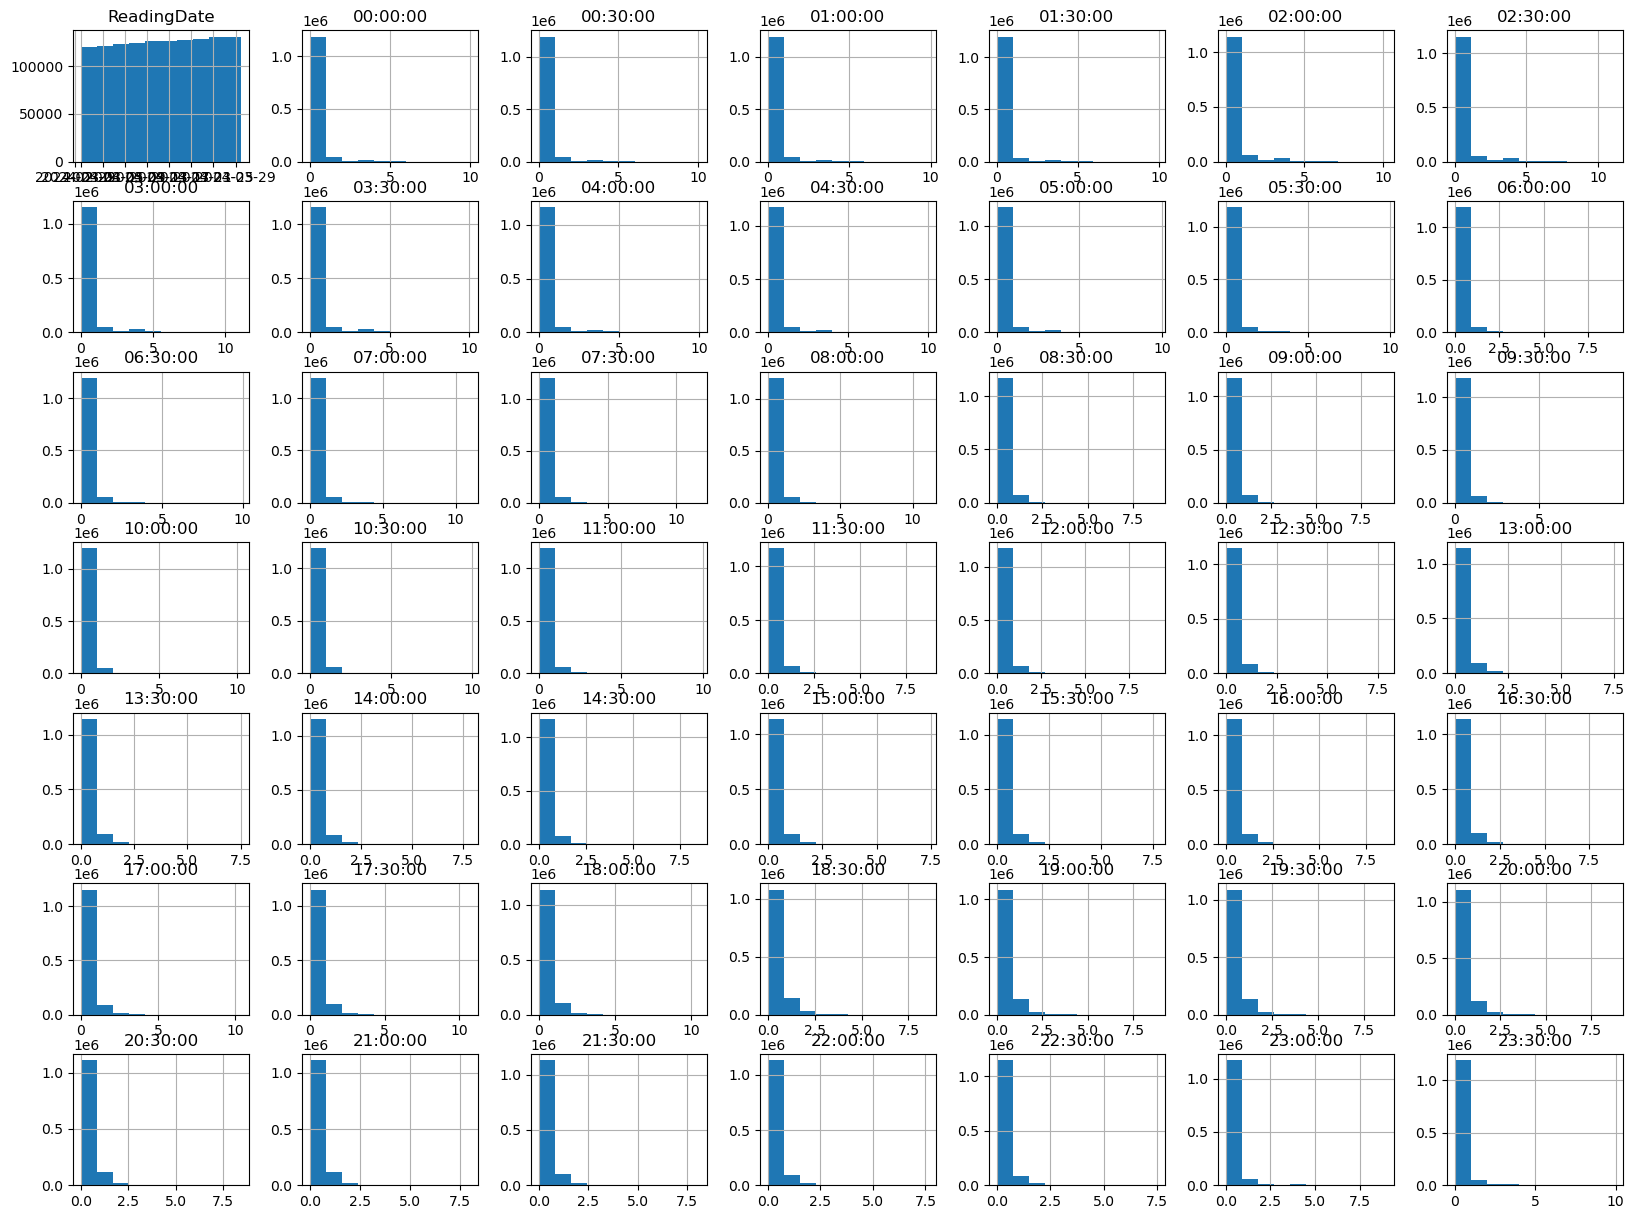

In [32]:
# distribution of variables
all_data_sorted.hist(figsize=(20, 15))
plt.show()

## CORRELATION

In [33]:
# calculating correlations
# Selecting numeric columns for correlation analysis
numeric_columns = all_data_sorted.select_dtypes(include=[np.number]).columns

# Calculating the correlation matrix
correlation_matrix = all_data_sorted[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

          00:00:00  00:30:00  01:00:00  01:30:00  02:00:00  02:30:00  \
00:00:00  1.000000  0.897544  0.802326  0.749755  0.418072  0.369364   
00:30:00  0.897544  1.000000  0.883696  0.817425  0.458068  0.405574   
01:00:00  0.802326  0.883696  1.000000  0.915066  0.511659  0.452154   
01:30:00  0.749755  0.817425  0.915066  1.000000  0.572275  0.503590   
02:00:00  0.418072  0.458068  0.511659  0.572275  1.000000  0.954161   
02:30:00  0.369364  0.405574  0.452154  0.503590  0.954161  1.000000   
03:00:00  0.344373  0.376938  0.419635  0.466076  0.900876  0.946438   
03:30:00  0.329059  0.360085  0.398907  0.442760  0.851830  0.891011   
04:00:00  0.312134  0.340799  0.377789  0.416538  0.787021  0.819850   
04:30:00  0.300776  0.328578  0.362724  0.399258  0.732349  0.759362   
05:00:00  0.290611  0.314703  0.345152  0.377228  0.664930  0.685887   
05:30:00  0.287838  0.309517  0.336265  0.364302  0.592224  0.607169   
06:00:00  0.347983  0.366044  0.387332  0.406128  0.300723  0.29

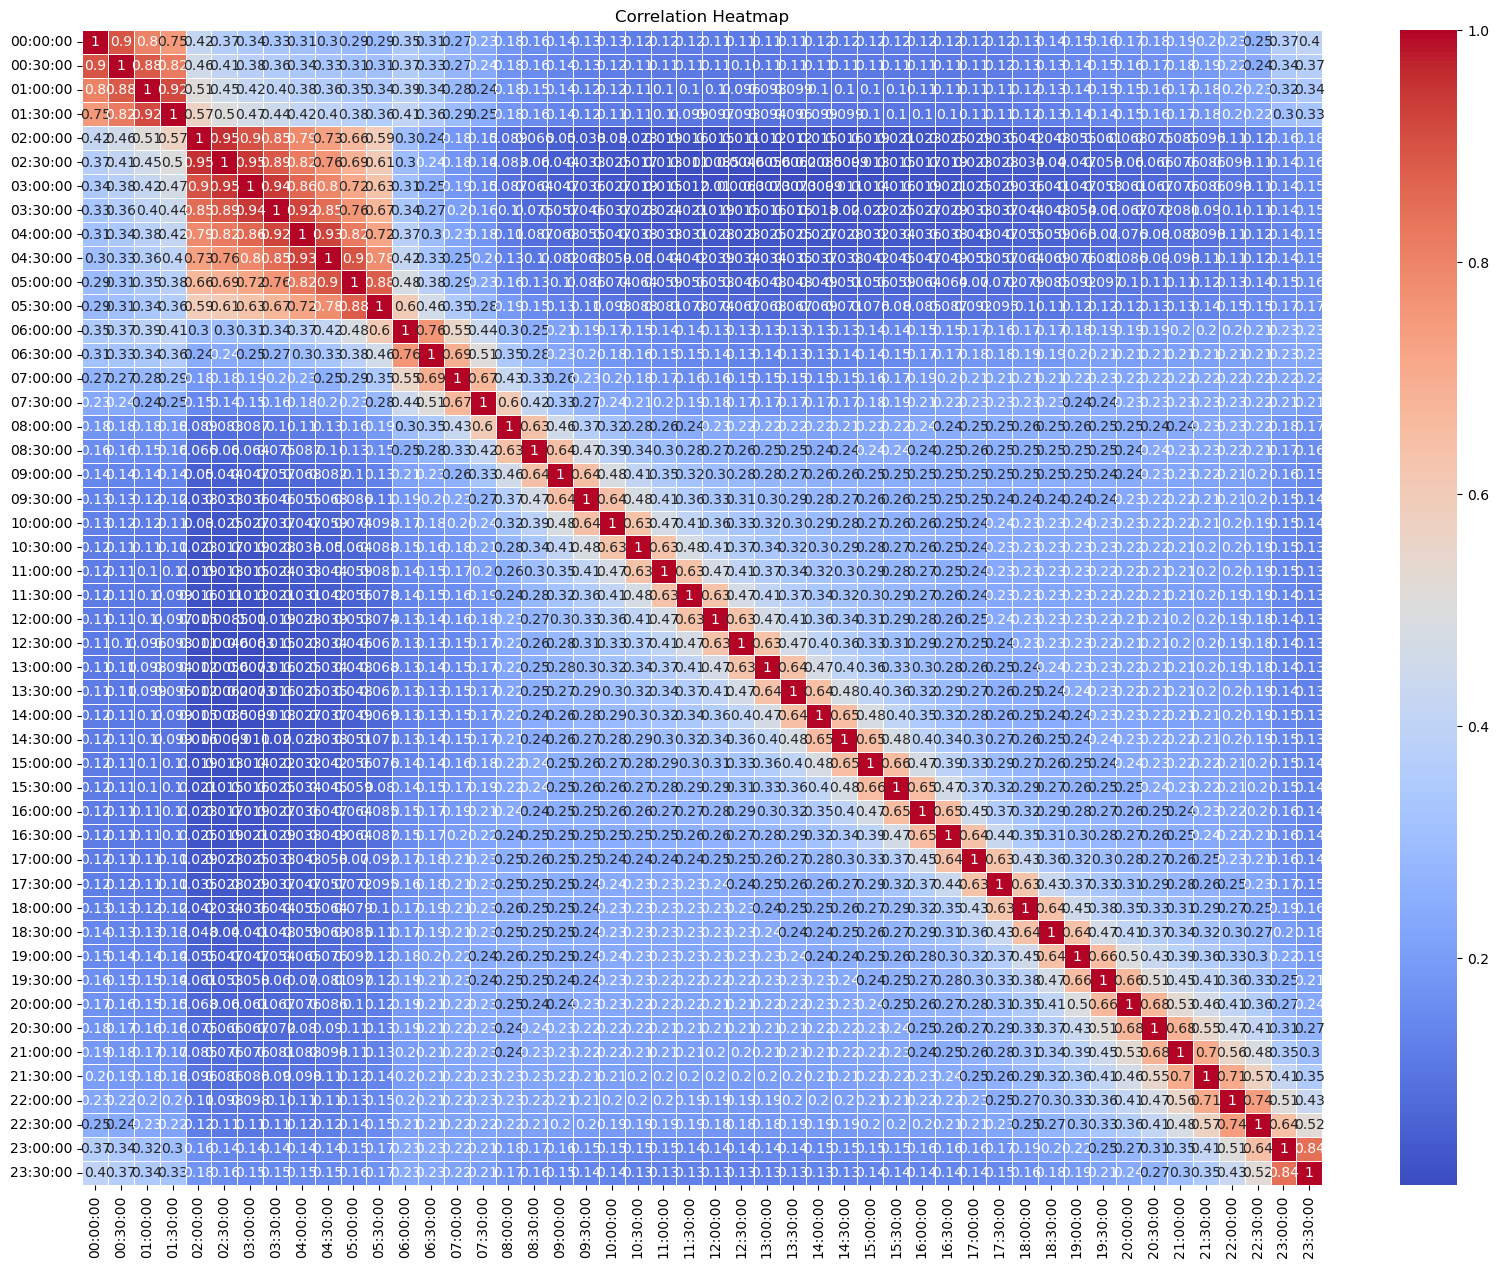

In [34]:
# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# # Create a pair plot
# sns.pairplot(all_data_sorted[numeric_columns])
# plt.show()

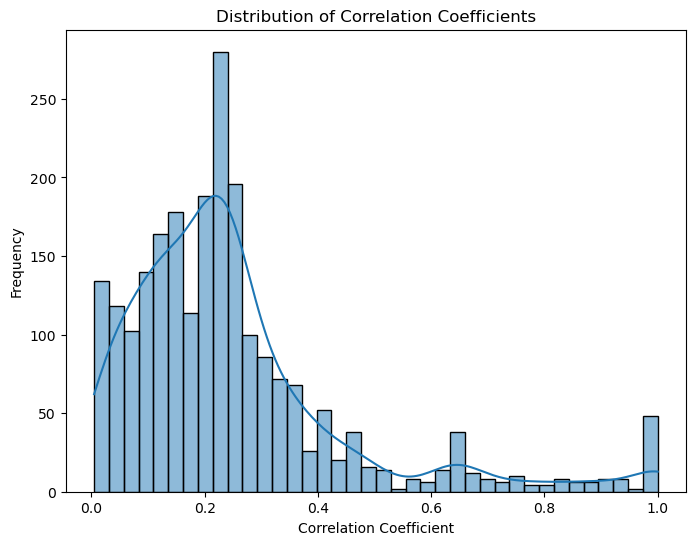

In [36]:
# distribution of correlation coefficients
correlation_values = correlation_matrix.values.flatten()
plt.figure(figsize=(8, 6))
sns.histplot(correlation_values, kde=True)
plt.title('Distribution of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Identify Strong and Weak Correlations
strong_positive_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1)]
strong_negative_corr = correlation_matrix[correlation_matrix < -0.7]
weak_corr = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)]

strong_positive_corr_pairs = strong_positive_corr.stack().index.tolist()
strong_negative_corr_pairs = strong_negative_corr.stack().index.tolist()
weak_corr_pairs = weak_corr.stack().index.tolist()

print(f"Strong positive correlations (>0.7): {len(strong_positive_corr_pairs)} pairs")
print(f"Strong negative correlations (<-0.7): {len(strong_negative_corr_pairs)} pairs")
print(f"Weak correlations (~0): {len(weak_corr_pairs)} pairs")

Strong positive correlations (>0.7): 66 pairs
Strong negative correlations (<-0.7): 0 pairs
Weak correlations (~0): 428 pairs


In [38]:
# Identify strong and weak correlations
strong_positive_corr = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1)]
weak_corr = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)]

# Flatten the correlation matrix for easier manipulation
strong_positive_corr = strong_positive_corr.stack().reset_index()
strong_positive_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

weak_corr = weak_corr.stack().reset_index()
weak_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort strong positive correlations by correlation strength
strong_positive_corr_sorted = strong_positive_corr.sort_values(by='Correlation', ascending=False)

# Sort weak correlations by correlation strength
weak_corr_sorted = weak_corr.sort_values(by='Correlation', ascending=False)

# Display top 10 strong positive correlations
print("\nTop 10 Strong Positive Correlations:")
print(strong_positive_corr_sorted.head(10))

# Display top 10 weak correlations
print("\nTop 10 Weak Correlations:")
print(weak_corr_sorted.head(10))


Top 10 Strong Positive Correlations:
   Feature 1 Feature 2  Correlation
12  02:00:00  02:30:00     0.954161
17  02:30:00  02:00:00     0.954161
23  03:00:00  02:30:00     0.946438
18  02:30:00  03:00:00     0.946438
30  03:30:00  03:00:00     0.943691
24  03:00:00  03:30:00     0.943691
38  04:00:00  04:30:00     0.926260
45  04:30:00  04:00:00     0.926260
31  03:30:00  04:00:00     0.924654
37  04:00:00  03:30:00     0.924654

Top 10 Weak Correlations:
    Feature 1 Feature 2  Correlation
10   01:30:00  15:00:00     0.099912
326  15:00:00  01:30:00     0.099912
97   03:30:00  08:00:00     0.099889
217  08:00:00  03:30:00     0.099889
2    01:00:00  13:30:00     0.099454
298  13:30:00  01:00:00     0.099454
9    01:30:00  14:30:00     0.099241
317  14:30:00  01:30:00     0.099241
260  11:30:00  01:30:00     0.099137
3    01:30:00  11:30:00     0.099137


## TIME SERIES AUTO-CORRELATION ANALYSIS 

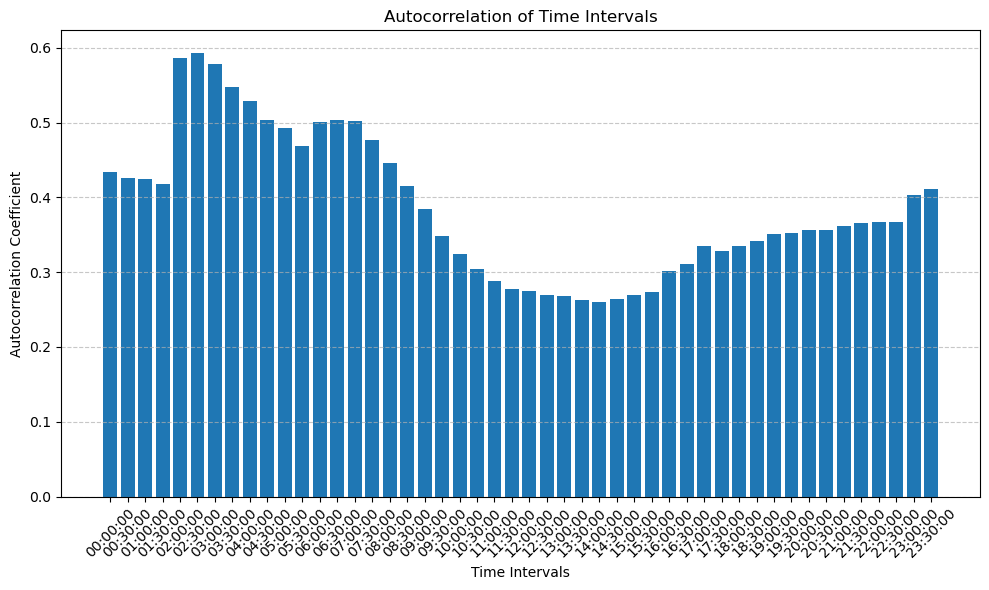

In [39]:
# Select relevant columns for autocorrelation analysis
time_intervals = all_data_sorted.columns[5:-1]  

# Calculate autocorrelations
autocorrelations = [all_data_sorted[interval].autocorr() for interval in time_intervals]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(time_intervals, autocorrelations)
plt.title('Autocorrelation of Time Intervals')
plt.xlabel('Time Intervals')
plt.ylabel('Autocorrelation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

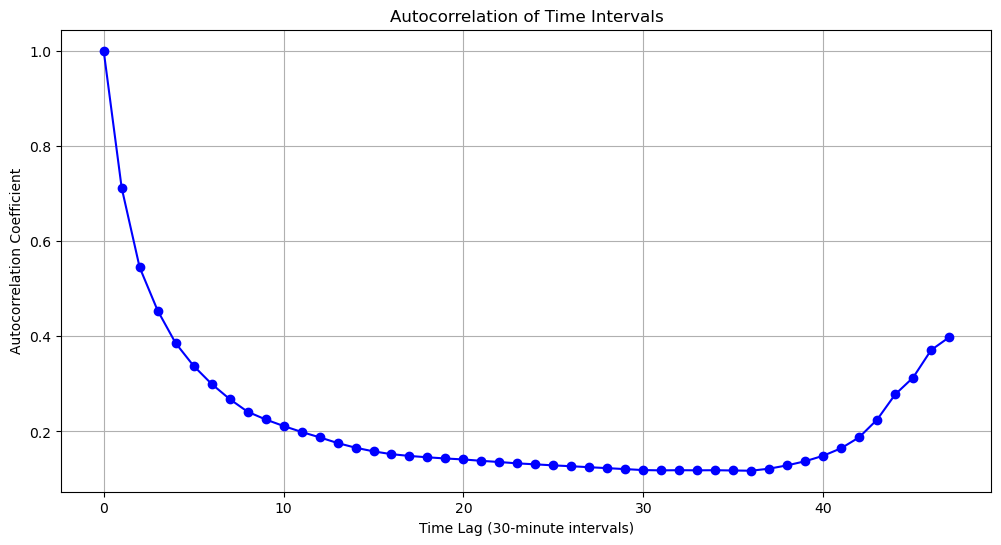

In [40]:
# Calculate autocorrelation for each time lag
time_intervals = all_data_sorted.columns[5:-1]  # Adjust based on actual column indices for time intervals
num_intervals = len(time_intervals)
autocorrelations = []

for lag in range(num_intervals):
    if lag == 0:
        autocorrelations.append(1)  # Autocorrelation with itself is always 1
    else:
        # Calculate the mean autocorrelation for the given lag
        correlation_sum = 0
        count = 0
        for i in range(num_intervals - lag):
            correlation = all_data_sorted[time_intervals[i]].corr(all_data_sorted[time_intervals[i + lag]])
            if not pd.isna(correlation):
                correlation_sum += correlation
                count += 1
        autocorrelations.append(correlation_sum / count if count != 0 else 0)

# Plot the autocorrelation
plt.figure(figsize=(12, 6))
plt.plot(range(num_intervals), autocorrelations, marker='o', linestyle='-', color='b')
plt.title('Autocorrelation of Time Intervals')
plt.xlabel('Time Lag (30-minute intervals)')
plt.ylabel('Autocorrelation Coefficient')
plt.grid(True)
plt.show()

## ENERGY CONSUMPTION PATTERN 

In [41]:
# Adding columns TotalEnergy and AverageEnergy in all_data_sorted
# Select the columns that represent energy consumption at each interval
time_intervals = all_data_sorted.columns[5:-1]  

# Calculate the total energy consumption for each row
all_data_sorted['TotalEnergy'] = all_data_sorted[time_intervals].sum(axis=1)

# Calculate the average energy consumption for each row
all_data_sorted['AverageEnergy'] = all_data_sorted[time_intervals].mean(axis=1)

all_data_sorted.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,day,TotalEnergy,AverageEnergy
189623,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-01,0.1990,2.1035,3.6705,3.6295,3.6060,...,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070,Friday,29.2705,0.609802
189624,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-02,2.3175,3.6695,3.6485,1.9750,0.2550,...,0.2980,0.3435,0.3805,0.2440,0.2245,0.2075,0.2235,Saturday,19.5060,0.406375
189625,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-03,3.5440,3.8125,3.6915,3.2670,0.7600,...,0.4615,0.6085,0.3050,0.1675,0.1765,0.5400,3.5095,Sunday,28.3495,0.590615
189626,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-04,3.6715,3.6755,1.3130,0.1725,0.0570,...,0.1940,0.1315,0.5420,3.6115,3.6620,3.6845,2.6700,Monday,29.6725,0.618177
189627,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-05,0.3405,0.0380,0.0730,0.0410,0.0385,...,0.0765,0.0810,0.0955,0.0980,0.0820,0.0910,0.0770,Tuesday,4.6670,0.097229


In [42]:
# Ensure that TotalEnergy is correctly computed
time_intervals = all_data_sorted.columns[5:-3]  # Adjust based on actual column indices for time intervals
all_data_sorted['TotalEnergy'] = all_data_sorted[time_intervals].sum(axis=1)

# Display a few rows to verify
all_data_sorted[['ReadingDate', 'TotalEnergy']].head(10)

,ReadingDate,TotalEnergy
189623,2024-03-01,29.2705
189624,2024-03-02,19.5060
189625,2024-03-03,28.3495
189626,2024-03-04,29.6725
189627,2024-03-05,4.6670
189628,2024-03-06,3.3640
189629,2024-03-07,3.5695
477270,2024-03-08,3.1800
477271,2024-03-09,27.2720
477272,2024-03-10,14.4455


In [43]:
# Group by 'ReadingDate' and sum the 'TotalEnergy'
daily_energy = all_data_sorted.groupby(all_data_sorted['ReadingDate'].dt.date)['TotalEnergy'].sum()

# Display the results for verification
daily_energy.head()

ReadingDate
2024-03-01    689597.6450
2024-03-02    672075.6960
2024-03-03    656283.5710
2024-03-04    646860.7945
2024-03-05    597522.9610
Name: TotalEnergy, dtype: float64

In [44]:
# Code to Filter and Print Data for a Specific Date

# Ensure 'ReadingDate' is in datetime format
all_data_sorted['ReadingDate'] = pd.to_datetime(all_data_sorted['ReadingDate'])

# Filter rows for the specific date
specific_date = '2024-03-01'
filtered_data = all_data_sorted[all_data_sorted['ReadingDate'].dt.date == pd.to_datetime(specific_date).date()]

# Print the filtered data
filtered_data

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,day,TotalEnergy,AverageEnergy
189623,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-01,0.1990,2.1035,3.6705,3.6295,3.6060,...,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070,Friday,29.2705,0.609802
189630,10039346713,SMTOU0001 - Default TOU MCC12,Selectra Elect MCC12 Time of Use 15%,1773,2024-03-01,0.3170,0.2425,0.2010,0.1780,0.1435,...,0.4125,0.2725,0.2250,0.2265,0.1760,0.1755,0.1790,Friday,10.0895,0.210198
190825,10039742582,SMTOU0007 - EV TOU Duo,ELE ACQ 12Mths MCC12 EV Duo 15%.,1888,2024-03-01,0.0040,0.0050,0.0060,0.0050,3.2465,...,0.0035,0.0070,0.0055,0.0060,0.0095,0.0075,0.0035,Friday,6.7685,0.141010
190804,10039745168,SMTOU0006 - Smart 24 hour Replica,ELE MCC12 24HR Replica Interaction,1834,2024-03-01,0.0415,0.0530,0.0385,0.0530,0.0400,...,0.0695,0.0630,0.0995,0.0810,0.0600,0.0460,0.0440,Friday,3.3345,0.069469
190811,10039745474,SMTOU0006 - Smart 24 hour Replica,DF RET 12 Mth Mcc12 TOU 24 hour 10%,1743,2024-03-01,0.0990,0.1010,0.0965,0.1005,0.0750,...,0.5950,0.9550,0.1775,0.8195,0.1060,0.0960,0.0940,Friday,11.9880,0.249750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199373,10303304469,SMTOU0006 - Smart 24 hour Replica,ELE RET 12 Mth Mcc12 TOU 24 hour 10%,1741,2024-03-01,0.0705,0.0485,0.0690,0.0720,0.0660,...,0.3630,0.8725,0.3190,0.3295,0.3020,0.3050,0.2175,Friday,11.2405,0.234177
199387,10303305562,SMTOU0006 - Smart 24 hour Replica,DF RET 24Mth Mcc12 TOU 24 hour 10%,1744,2024-03-01,0.0540,0.0775,0.0520,0.0505,0.0665,...,0.2145,0.1755,0.2400,0.3980,0.5775,0.1335,0.0885,Friday,9.0455,0.188448
199380,10303305582,SMTOU0001 - Default TOU MCC12,DF SMAQ MCC12 VAR HH 10,1378,2024-03-01,0.7315,0.6820,0.8560,0.8115,0.7810,...,1.8175,0.9980,1.0215,2.1575,1.5955,2.0200,1.2985,Friday,53.8965,1.122844
199359,10303305829,SMTOU0007 - EV TOU Duo,Ele Ret 12Mths MCC12 EV Duo 15%.,1890,2024-03-01,1.4790,1.3240,1.1400,1.1160,1.0880,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.1000,0.9690,Friday,19.8820,0.414208


In [45]:
# Calculate the sum of the 'TotalEnergy' column
total_energy_sum = filtered_data['TotalEnergy'].sum()
print(f"Total Energy consumed on {specific_date}: {total_energy_sum}")

Total Energy consumed on 2024-03-01: 689597.645


In [46]:
# Convert ReadingDate to datetime if it is not already
all_data_sorted['ReadingDate'] = pd.to_datetime(all_data_sorted['ReadingDate'])

# Group by 'ReadingDate' to aggregate energy consumption data by day
daily_energy = all_data_sorted.groupby(all_data_sorted['ReadingDate'].dt.date)['TotalEnergy'].sum()

daily_energy.head()

ReadingDate
2024-03-01    689597.6450
2024-03-02    672075.6960
2024-03-03    656283.5710
2024-03-04    646860.7945
2024-03-05    597522.9610
Name: TotalEnergy, dtype: float64

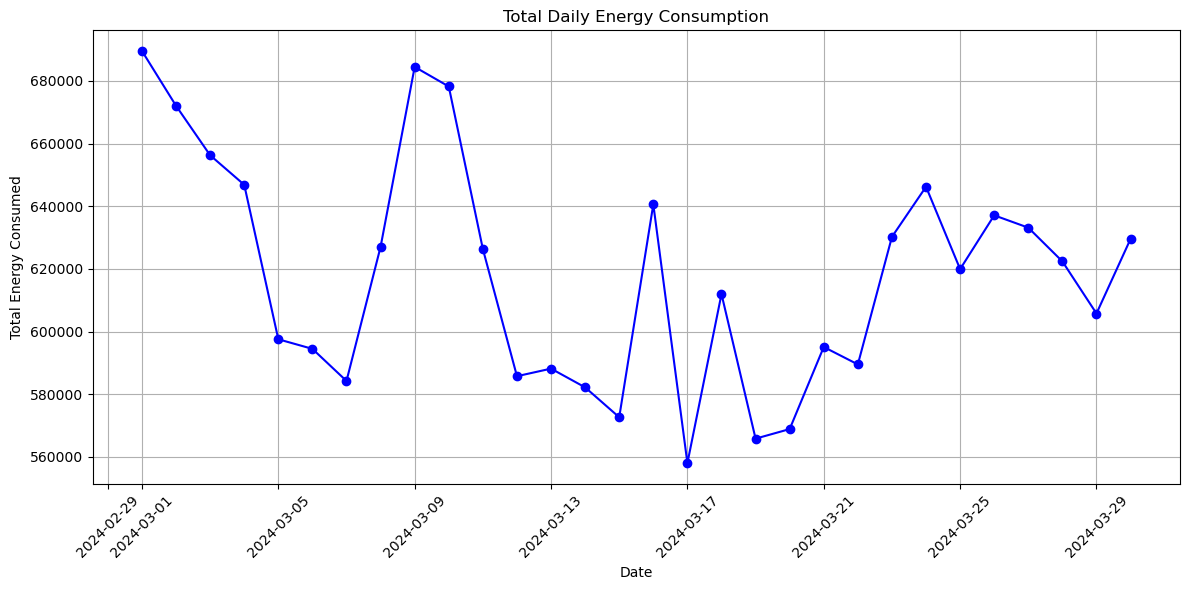

In [47]:
# # Calculate total energy consumed per day
# daily_energy['TotalEnergy'] = daily_energy.sum(axis=1)

# Plotting daily energy consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_energy.index, daily_energy, marker='o', linestyle='-', color='b')
plt.title('Total Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumed')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# # Convert TotalEnergy to a more readable scale (e.g., divide by 1e3 to convert to kWh if the data is in Wh)
# daily_energy['TotalEnergy'] = daily_energy['TotalEnergy'] / 1e3

# # Plotting daily energy consumption
# plt.figure(figsize=(12, 6))
# plt.plot(daily_energy.index, daily_energy['TotalEnergy'], marker='o', linestyle='-', color='g')
# plt.title('Total Daily Energy Consumption')
# plt.xlabel('Date')
# plt.ylabel('Total Energy Consumed (kWh)')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [49]:
# Calculate TotalEnergy for each row if not already calculated correctly
time_intervals = all_data_sorted.columns[5:-3]  # Adjust based on actual column indices for time intervals
all_data_sorted['TotalEnergy'] = all_data_sorted[time_intervals].sum(axis=1)

all_data_sorted.head()

# # Group by 'ReadingDate' and sum the 'TotalEnergy'
# daily_energy = all_data_sorted.groupby(all_data_sorted['ReadingDate'].dt.date)['TotalEnergy'].sum()

# # Display the results for verification
# daily_energy.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,day,TotalEnergy,AverageEnergy
189623,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-01,0.1990,2.1035,3.6705,3.6295,3.6060,...,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070,Friday,29.2705,0.609802
189624,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-02,2.3175,3.6695,3.6485,1.9750,0.2550,...,0.2980,0.3435,0.3805,0.2440,0.2245,0.2075,0.2235,Saturday,19.5060,0.406375
189625,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-03,3.5440,3.8125,3.6915,3.2670,0.7600,...,0.4615,0.6085,0.3050,0.1675,0.1765,0.5400,3.5095,Sunday,28.3495,0.590615
189626,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-04,3.6715,3.6755,1.3130,0.1725,0.0570,...,0.1940,0.1315,0.5420,3.6115,3.6620,3.6845,2.6700,Monday,29.6725,0.618177
189627,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-05,0.3405,0.0380,0.0730,0.0410,0.0385,...,0.0765,0.0810,0.0955,0.0980,0.0820,0.0910,0.0770,Tuesday,4.6670,0.097229


In [50]:
daily_energy.head()

ReadingDate
2024-03-01    689597.6450
2024-03-02    672075.6960
2024-03-03    656283.5710
2024-03-04    646860.7945
2024-03-05    597522.9610
Name: TotalEnergy, dtype: float64

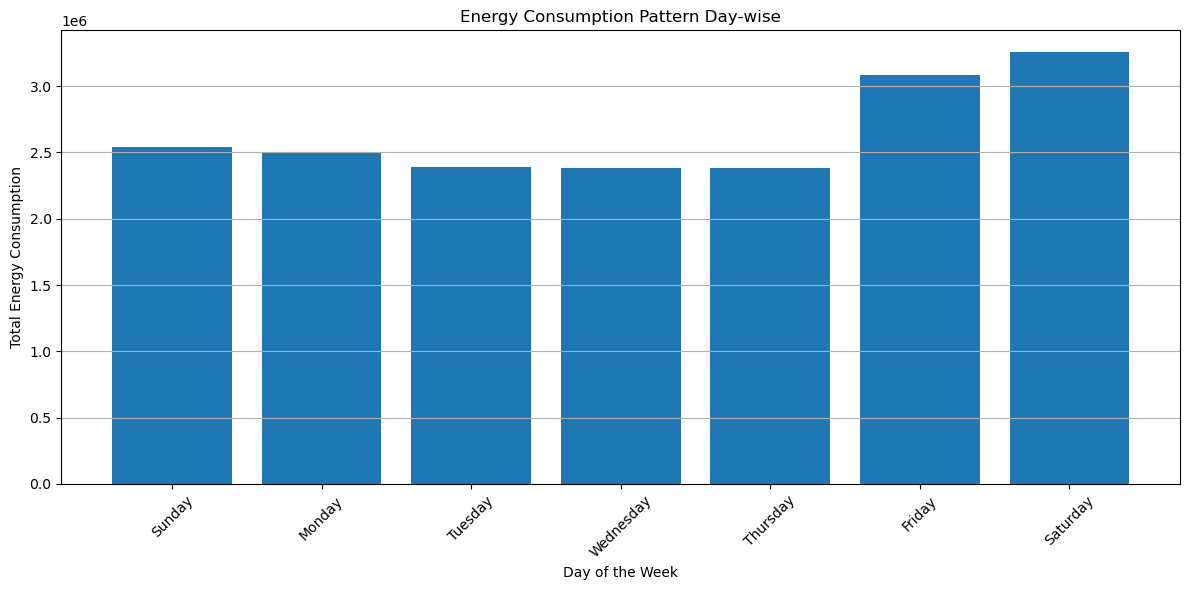

In [51]:
# Ensure the days are in the correct order
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'day' column to a categorical type with the specified order
all_data_sorted['day'] = pd.Categorical(all_data_sorted['day'], categories=day_order, ordered=True)

# Step 1: Group by 'day' column and sum the energy consumption across all time intervals
daily_energy_pattern = all_data_sorted.groupby('day')[time_intervals].sum()

# Step 2: Calculate the total energy consumption for each day
daily_energy_pattern['TotalEnergy'] = daily_energy_pattern.sum(axis=1)

# Step 3: Plot the patterns
plt.figure(figsize=(12, 6))
days = daily_energy_pattern.index
plt.bar(days, daily_energy_pattern['TotalEnergy'])
plt.xlabel('Day of the Week')
plt.ylabel('Total Energy Consumption')
plt.title('Energy Consumption Pattern Day-wise')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## TARIFF DISTRIBUTION

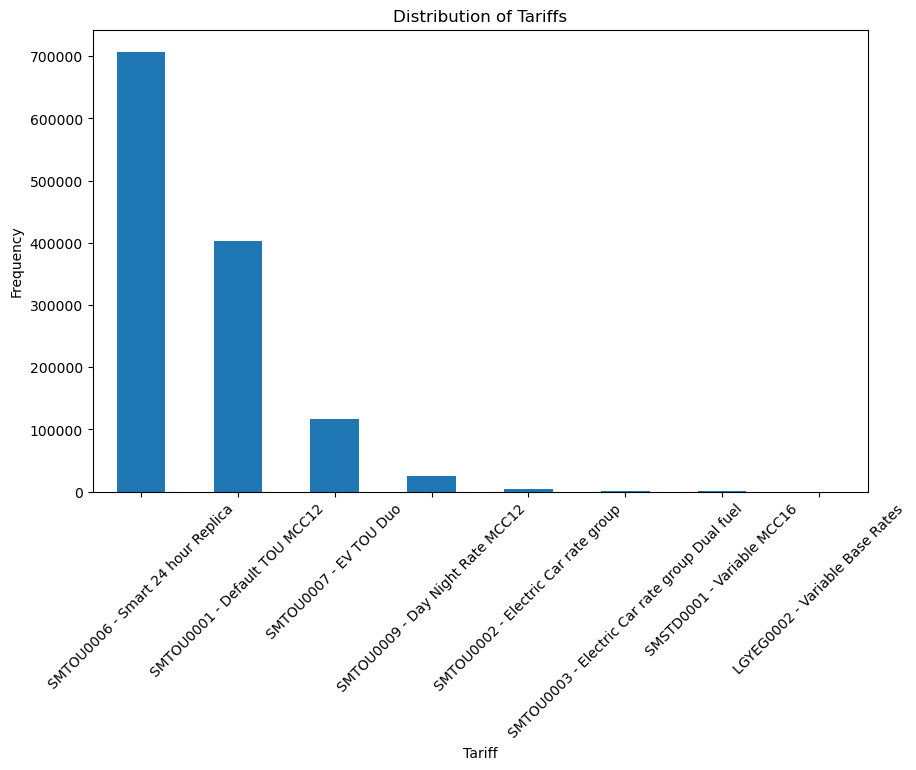

In [52]:
plt.figure(figsize=(10, 6))
all_data_sorted['Tariff'].value_counts().plot(kind='bar')
plt.title('Distribution of Tariffs')
plt.xlabel('Tariff')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

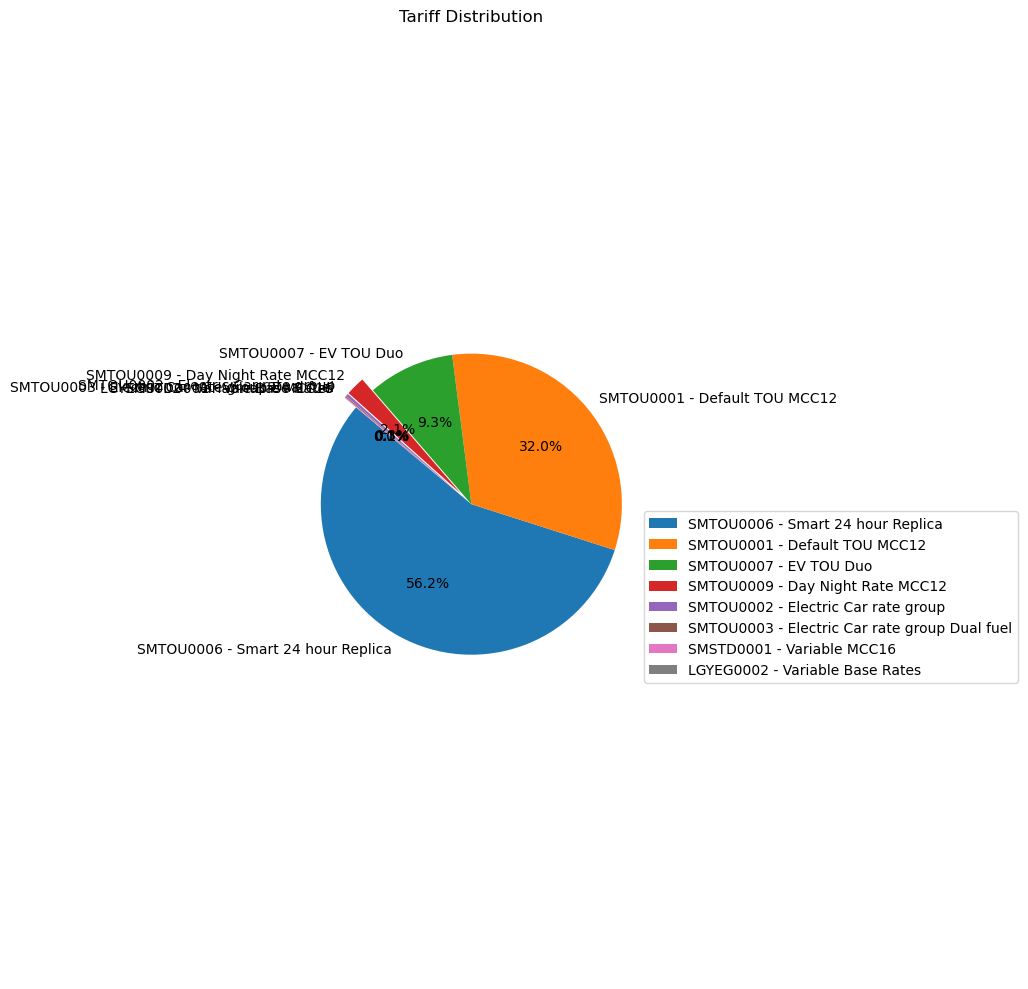

In [53]:
# Increase the figure size
plt.figure(figsize=(10, 10))

# Create the pie chart with the explode effect and a legend
tariff_counts = all_data_sorted['Tariff'].value_counts()
labels = tariff_counts.index
sizes = tariff_counts.values
explode = [0.1 if size < 0.021 * sum(sizes) else 0 for size in sizes]  # Explode smaller slices

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Tariff Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

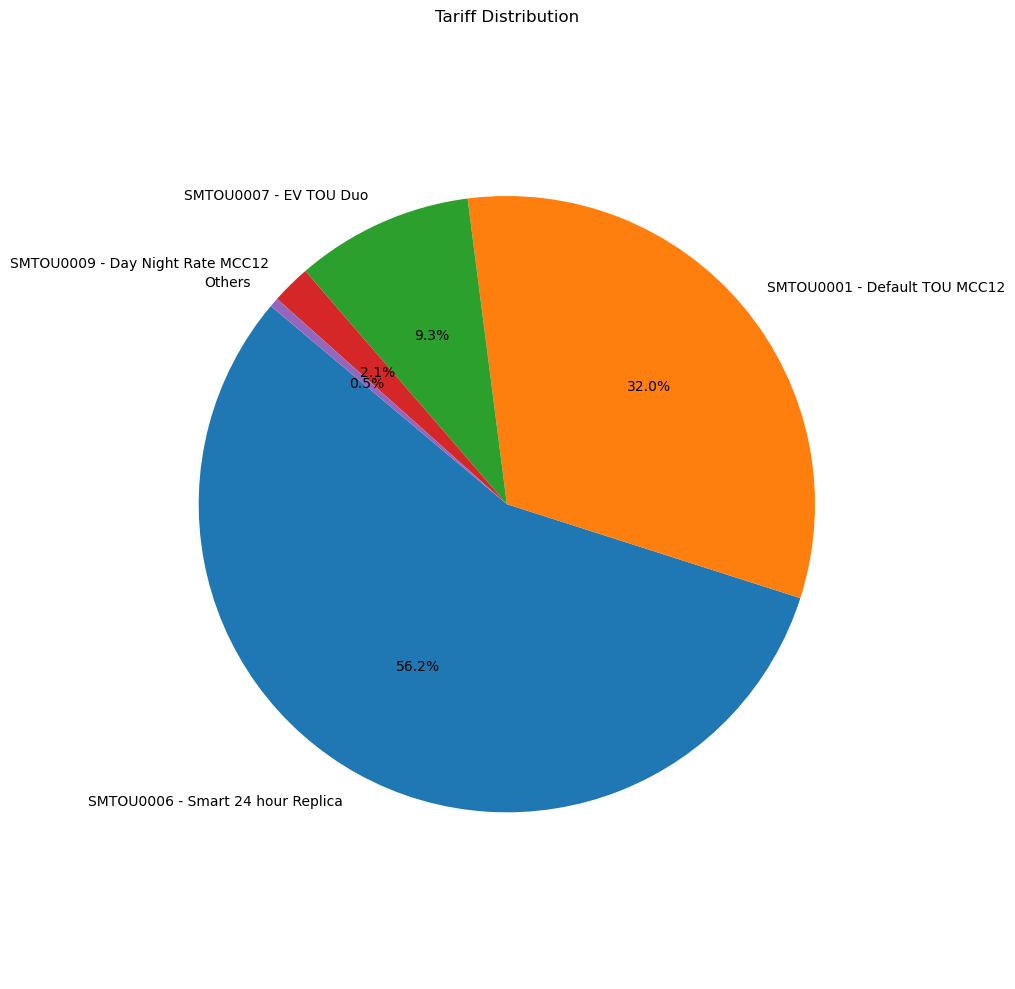

In [54]:
# Create a copy of the data to manipulate
tariff_counts = all_data_sorted['Tariff'].value_counts()

# Define a threshold to group smaller categories
threshold = 0.015 * sum(tariff_counts.values)

# Separate the tariffs into major and 'Others'
major_tariffs = tariff_counts[tariff_counts >= threshold]
minor_tariffs = tariff_counts[tariff_counts < threshold]

# Sum up the minor tariffs and add to 'Others'
minor_tariffs_sum = pd.Series([minor_tariffs.sum()], index=['Others'])
tariff_counts_combined = pd.concat([major_tariffs, minor_tariffs_sum])

# Create the pie chart
plt.figure(figsize=(10, 10))
sizes = tariff_counts_combined.values
labels = tariff_counts_combined.index

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tariff Distribution')
plt.axis('equal')

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [55]:
print(all_data_sorted.columns)

Index(['AnonymisedMPRN', 'Tariff', 'Product Name', 'Product Code',
       'ReadingDate', '00:00:00', '00:30:00', '01:00:00', '01:30:00',
       '02:00:00', '02:30:00', '03:00:00', '03:30:00', '04:00:00', '04:30:00',
       '05:00:00', '05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00',
       '08:00:00', '08:30:00', '09:00:00', '09:30:00', '10:00:00', '10:30:00',
       '11:00:00', '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00',
       '17:00:00', '17:30:00', '18:00:00', '18:30:00', '19:00:00', '19:30:00',
       '20:00:00', '20:30:00', '21:00:00', '21:30:00', '22:00:00', '22:30:00',
       '23:00:00', '23:30:00', 'day', 'TotalEnergy', 'AverageEnergy'],
      dtype='object')


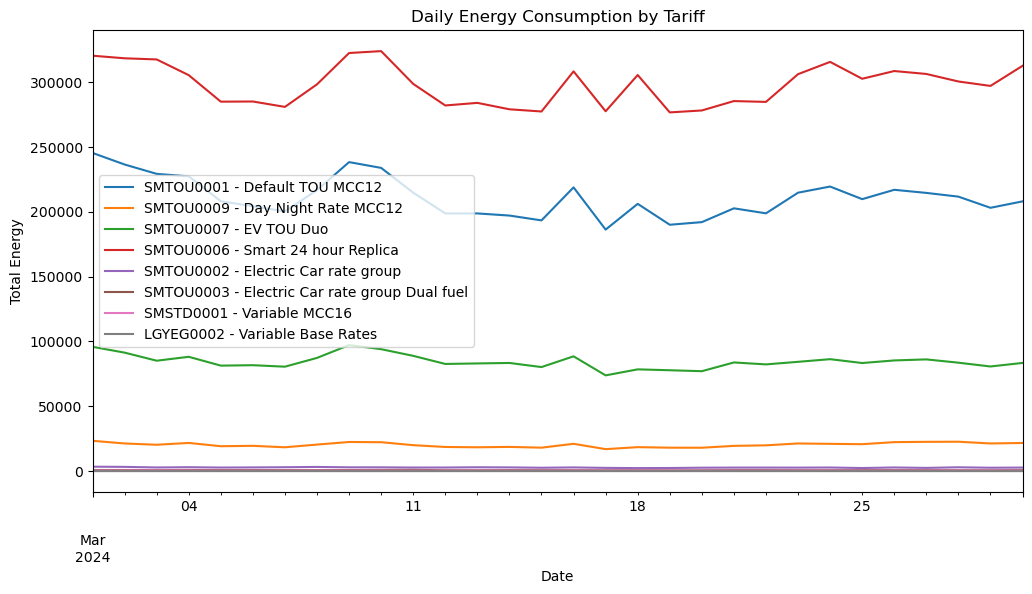

In [57]:
## Time-Series Analysis
# checking Energy consumption varies over time for different tariffs
plt.figure(figsize=(12, 6))
for tariff in all_data_sorted['Tariff'].unique():
    subset = all_data_sorted[all_data_sorted['Tariff'] == tariff]
    subset.groupby('ReadingDate')['TotalEnergy'].sum().plot(label=tariff)
plt.legend()
plt.title('Daily Energy Consumption by Tariff')
plt.xlabel('Date')
plt.ylabel('Total Energy')
plt.show()

### ENERGIA PRICING 

In [58]:
# Load the Excel file
energia_pricing = pd.read_excel("Energia Pricing.xlsx") 
energia_pricing.head()

,Attribute,RateGroupCode,Supplier,AccountFuelType,MeterType,Region,PlanName,Status,WeekdayUnitRateExVat,WeekendUnitRateExVat,StandingChargeExVat,last_updated_date
0,00:00:00,SMTOU0001 - Default TOU MCC12,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
1,00:30:00,SMTOU0001 - Default TOU MCC12,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
2,01:00:00,SMTOU0001 - Default TOU MCC12,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
3,01:30:00,SMTOU0001 - Default TOU MCC12,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
4,02:00:00,SMTOU0001 - Default TOU MCC12,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15


In [59]:
energia_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Attribute             576 non-null    object        
 1   RateGroupCode         576 non-null    object        
 2   Supplier              576 non-null    object        
 3   AccountFuelType       576 non-null    object        
 4   MeterType             576 non-null    object        
 5   Region                576 non-null    object        
 6   PlanName              576 non-null    object        
 7   Status                576 non-null    object        
 8   WeekdayUnitRateExVat  576 non-null    float64       
 9   WeekendUnitRateExVat  576 non-null    int64         
 10  StandingChargeExVat   576 non-null    float64       
 11  last_updated_date     576 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 54.1+ KB


In [60]:
len(energia_pricing)

576

In [61]:
print(energia_pricing.columns)

Index(['Attribute', 'RateGroupCode', 'Supplier', 'AccountFuelType',
       'MeterType', 'Region', 'PlanName', 'Status', 'WeekdayUnitRateExVat',
       'WeekendUnitRateExVat', 'StandingChargeExVat', 'last_updated_date'],
      dtype='object')


In [66]:
# Filter out rows where 'Status' is 'Not Active'
energia_pricing = energia_pricing[energia_pricing['Status'] == 'Active']

# Combine 'RateGroupCode' and 'Region' into a new column
energia_pricing['RateGroupCode'] = energia_pricing['RateGroupCode'] +energia_pricing['Region']

# Define the filename for the new Excel file
excel_file = 'filtered_energia_pricing.xlsx'

# Save the filtered DataFrame to a new Excel file
energia_pricing.to_excel(excel_file, index=False)

print(f"Filtered data saved to {excel_file}")



Filtered data saved to filtered_energia_pricing.xlsx


In [67]:
# Get unique values of 'RateGroupCode'

filtered_energia_pricing = pd.read_excel('filtered_energia_pricing.xlsx')
unique_rate_group_codes = filtered_energia_pricing['RateGroupCode'].unique()

print("Unique RateGroupCodes:", unique_rate_group_codes)

Unique RateGroupCodes: ['SMTOU0001 - Default TOU MCC12Urban' 'SMTOU0007 - EV TOU DuoUrban'
 'SMTOU0006 - Smart 24 hour ReplicaUrban'
 'SMTOU0009 - Day Night Rate MCC12Urban'
 'SMTOU0001 - Default TOU MCC12Rural' 'SMTOU0007 - EV TOU DuoRural'
 'SMTOU0006 - Smart 24 hour ReplicaRural'
 'SMTOU0009 - Day Night Rate MCC12Rural']


In [68]:
filtered_energia_pricing = pd.read_excel('filtered_energia_pricing.xlsx')
filtered_energia_pricing.head()

,Attribute,RateGroupCode,Supplier,AccountFuelType,MeterType,Region,PlanName,Status,WeekdayUnitRateExVat,WeekendUnitRateExVat,StandingChargeExVat,last_updated_date
0,00:00:00,SMTOU0001 - Default TOU MCC12Urban,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
1,00:30:00,SMTOU0001 - Default TOU MCC12Urban,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
2,01:00:00,SMTOU0001 - Default TOU MCC12Urban,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
3,01:30:00,SMTOU0001 - Default TOU MCC12Urban,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15
4,02:00:00,SMTOU0001 - Default TOU MCC12Urban,Energia,Electricity,MCC12,Urban,Energia Smart Data,Active,0.1848,0,217.08,2024-05-15


In [69]:
# Load the Excel file into a DataFrame
book1_df = pd.read_excel('WeekDayUnitRateExVat.xlsx')

# Display the dataframe
book1_df

,RateGroupCode,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
0,SMTOU0001 - Default TOU MCC12Rural,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,...,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.1848,0.1848
1,SMTOU0001 - Default TOU MCC12Urban,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,...,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.1848,0.1848
2,SMTOU0006 - Smart 24 hour ReplicaRural,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,...,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288
3,SMTOU0006 - Smart 24 hour ReplicaUrban,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,...,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288
4,SMTOU0007 - EV TOU DuoRural,0.3655,0.3655,0.3655,0.3655,0.0814,0.0814,0.0814,0.0814,0.0814,...,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655
5,SMTOU0007 - EV TOU DuoUrban,0.3655,0.3655,0.3655,0.3655,0.0814,0.0814,0.0814,0.0814,0.0814,...,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655
6,SMTOU0009 - Day Night Rate MCC12Rural,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,...,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.1729,0.1729
7,SMTOU0009 - Day Night Rate MCC12Urban,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,...,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.1729,0.1729


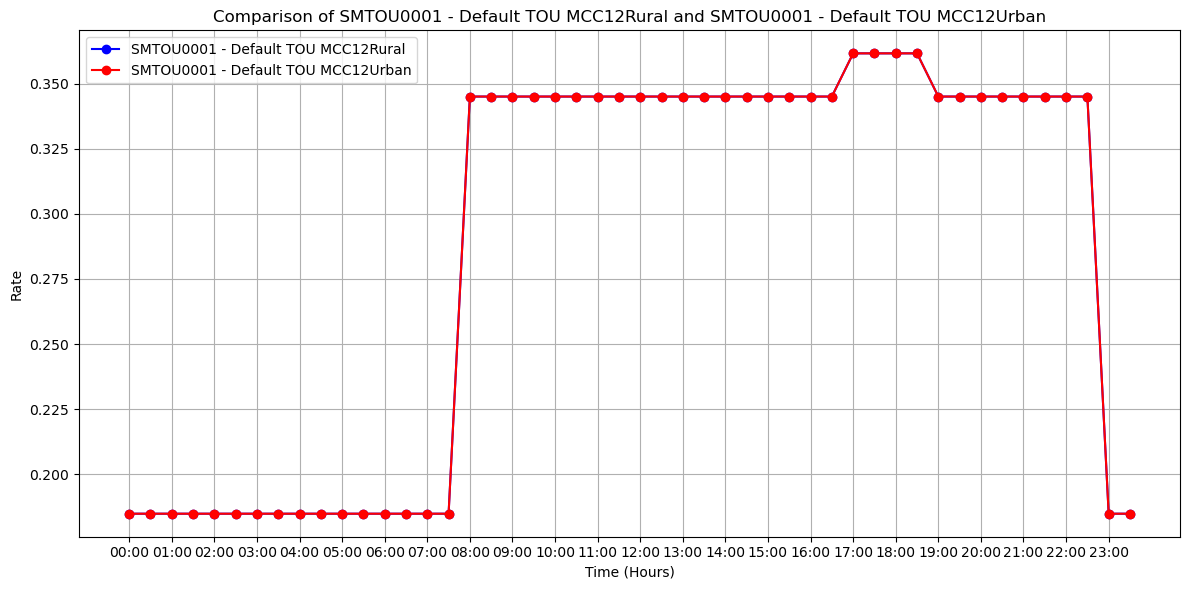

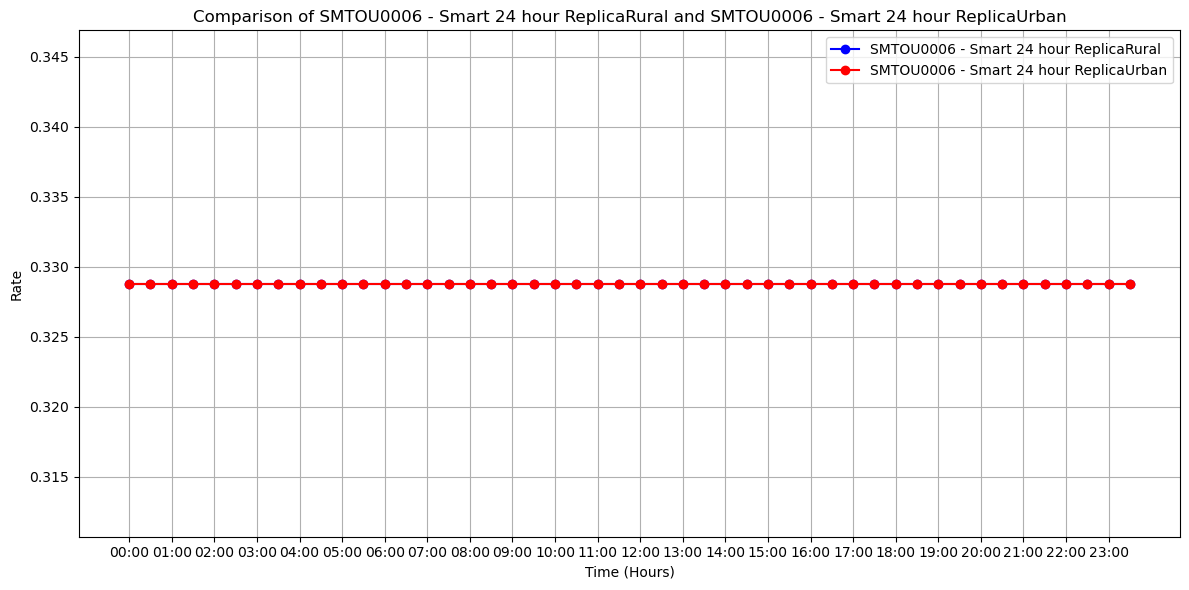

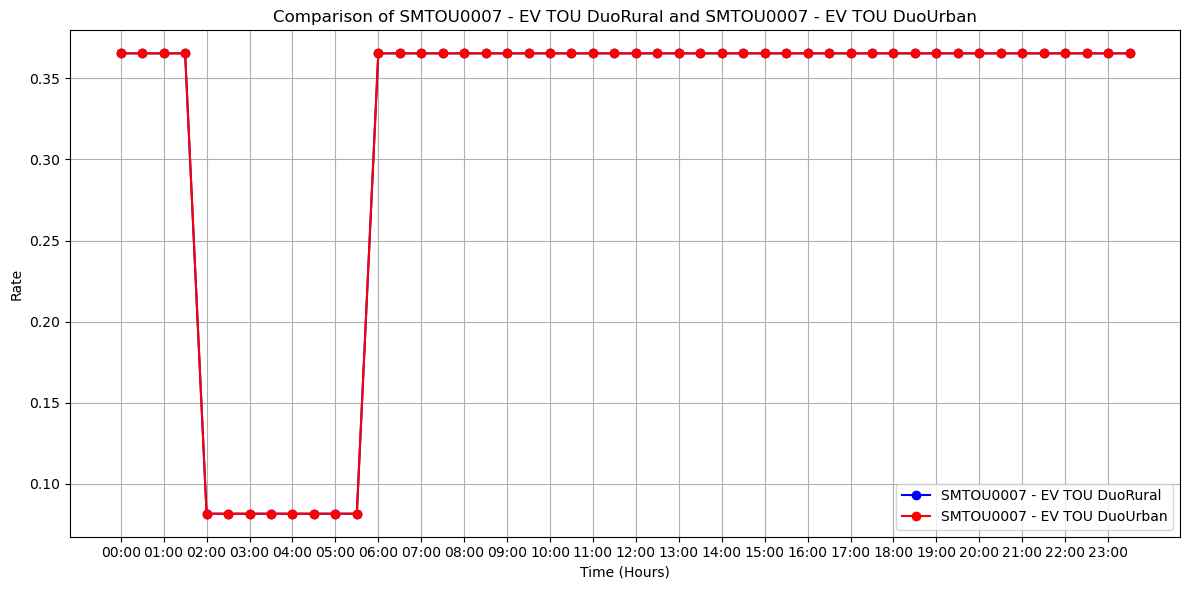

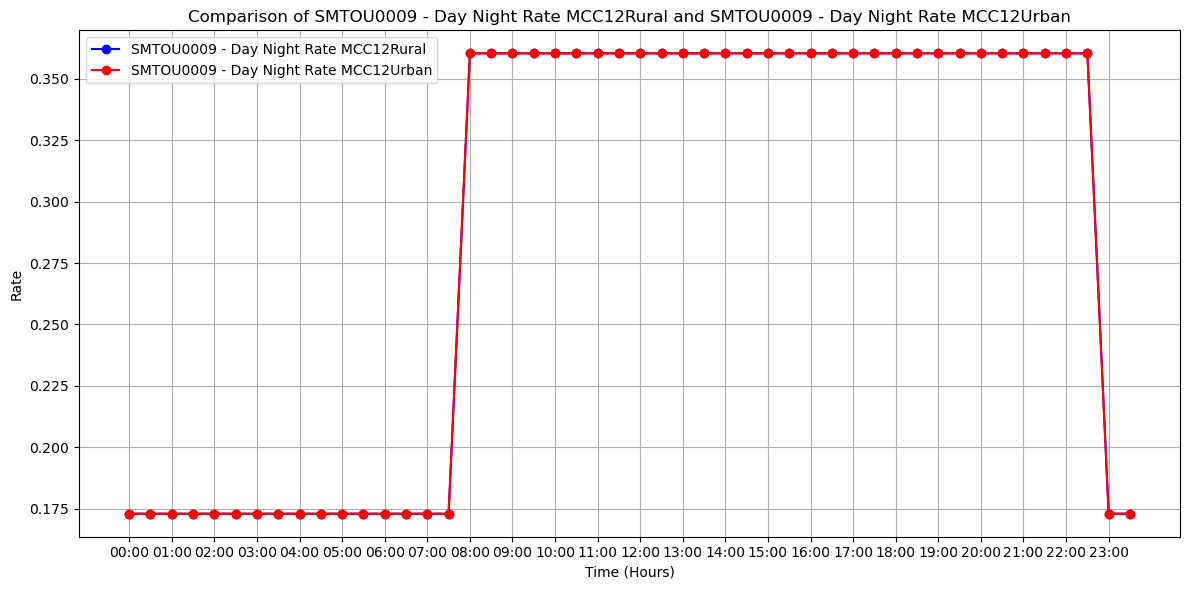

In [70]:
from datetime import datetime

# Function to convert datetime.time to float hours
def time_to_float(time_obj):
    """Convert a datetime.time object to a float representing hours."""
    return time_obj.hour + time_obj.minute / 60 + time_obj.second / 3600

# Example DataFrame setup (replace with your actual DataFrame loading code)
# book1_df = pd.read_csv('your_file.csv')  # Uncomment this line if loading from CSV

# Extract time slots as float values
time_slots = book1_df.columns[1:]  # Exclude the first column which contains RateGroupCode

# Convert time slots to float hours
time_slots_floats = [time_to_float(t) for t in time_slots]

# Define the pairs of rows to compare
row_pairs = [(0, 1), (2, 3), (4, 5), (6, 7)]

# Plotting the data
for i, (row1, row2) in enumerate(row_pairs):
    plt.figure(figsize=(12, 6))
    
    rate_group1 = book1_df.iloc[row1, 1:].values  # Exclude the first column which contains RateGroupCode
    rate_group2 = book1_df.iloc[row2, 1:].values  # Exclude the first column which contains RateGroupCode

    # Ensure time slots and rates have the same length
    if len(time_slots_floats) != len(rate_group1) or len(time_slots_floats) != len(rate_group2):
        print(f"Length mismatch for rows {row1} and {row2}")
        continue

    plt.plot(time_slots_floats, rate_group1, marker='o', linestyle='-', color='b', label=book1_df.iloc[row1, 0])
    plt.plot(time_slots_floats, rate_group2, marker='o', linestyle='-', color='r', label=book1_df.iloc[row2, 0])
    
    plt.title(f'Comparison of {book1_df.iloc[row1, 0]} and {book1_df.iloc[row2, 0]}')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Rate')
    plt.xticks(ticks=[h for h in range(24)], labels=[f'{h:02d}:00' for h in range(24)])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [71]:
# Load the Excel file into a DataFrame
book2_df = pd.read_excel('StandingChargeExVat .xlsx')

# Display the dataframe
book2_df

,RateGroupCode,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
0,SMTOU0001 - Default TOU MCC12Rural,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,...,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06
1,SMTOU0001 - Default TOU MCC12Urban,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,...,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08
2,SMTOU0006 - Smart 24 hour ReplicaRural,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,...,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06
3,SMTOU0006 - Smart 24 hour ReplicaUrban,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,...,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08
4,SMTOU0007 - EV TOU DuoRural,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,...,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06,276.06
5,SMTOU0007 - EV TOU DuoUrban,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,...,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08,217.08
6,SMTOU0009 - Day Night Rate MCC12Rural,345.93,345.93,345.93,345.93,345.93,345.93,345.93,345.93,345.93,...,345.93,345.93,345.93,345.93,345.93,345.93,345.93,345.93,345.93,345.93
7,SMTOU0009 - Day Night Rate MCC12Urban,271.93,271.93,271.93,271.93,271.93,271.93,271.93,271.93,271.93,...,271.93,271.93,271.93,271.93,271.93,271.93,271.93,271.93,271.93,271.93


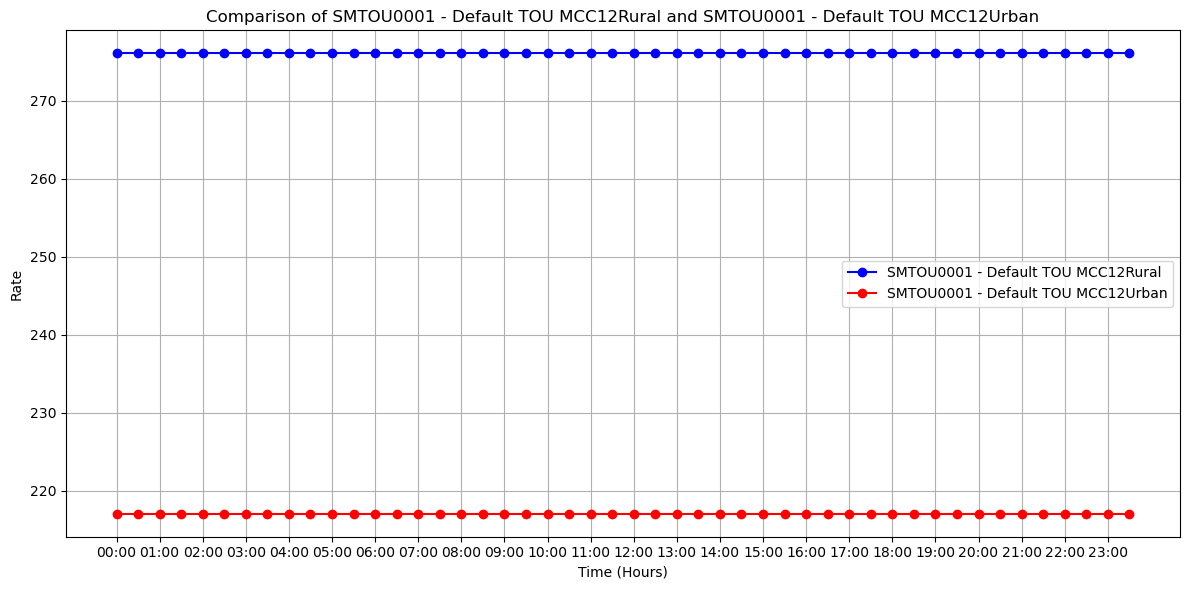

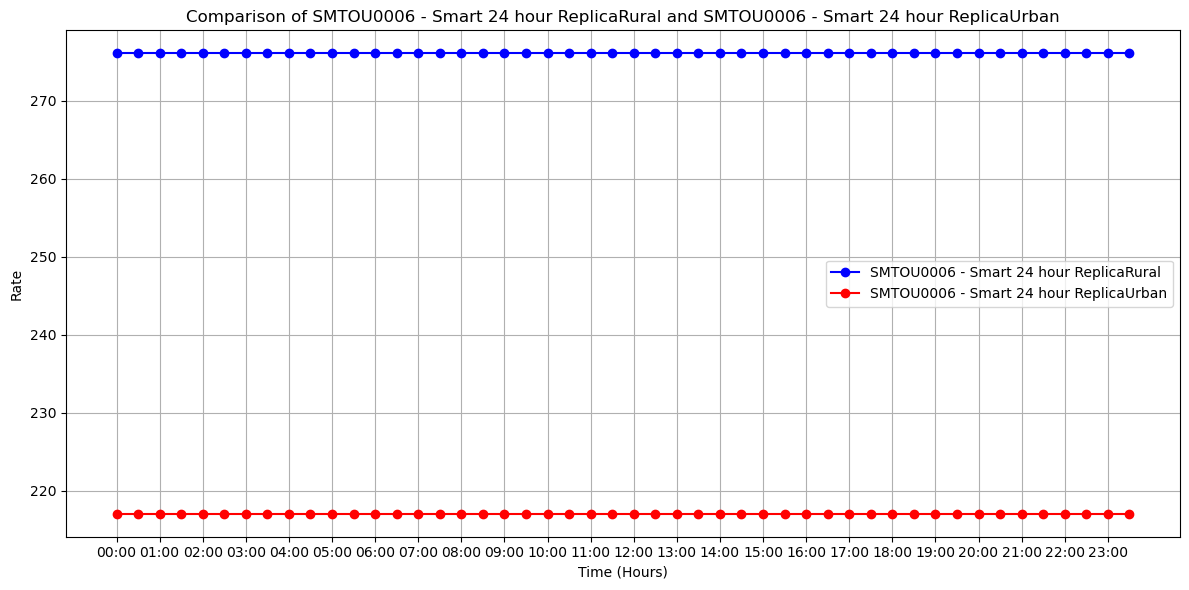

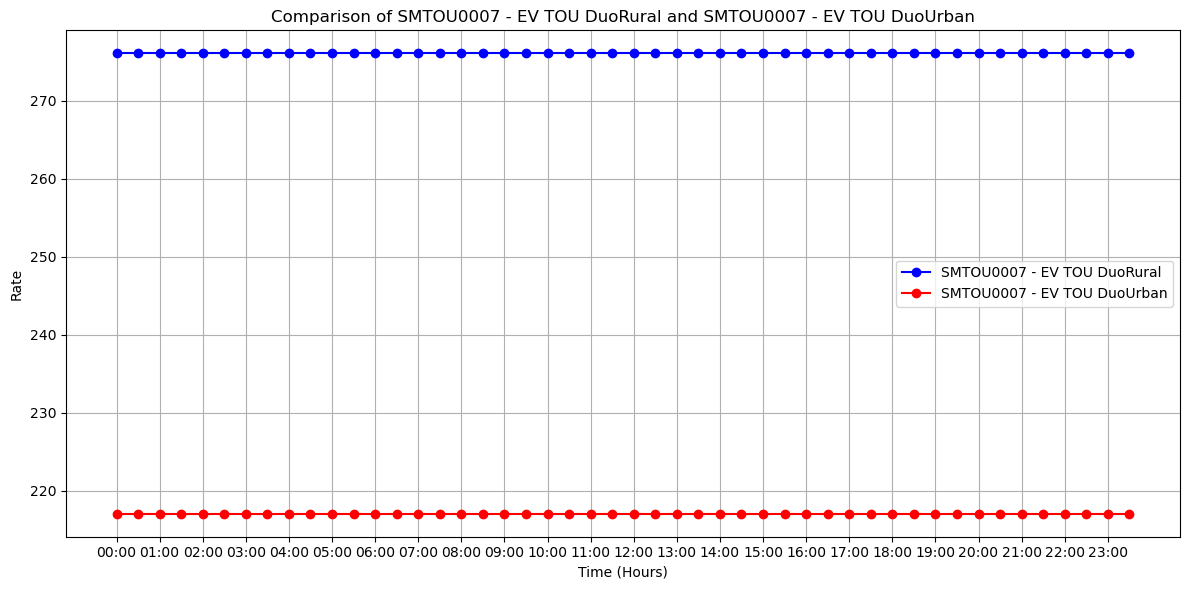

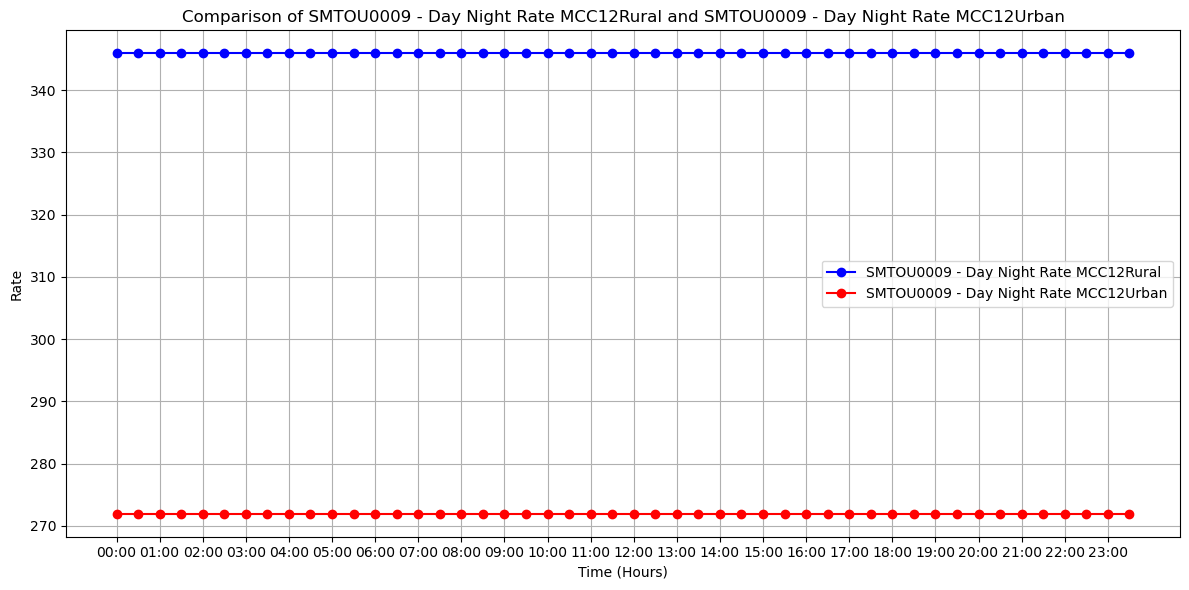

In [72]:
from datetime import datetime

# Function to convert datetime.time to float hours
def time_to_float(time_obj):
    """Convert a datetime.time object to a float representing hours."""
    return time_obj.hour + time_obj.minute / 60 + time_obj.second / 3600

# Example DataFrame setup (replace with your actual DataFrame loading code)
# book2_df = pd.read_csv('your_file.csv')  # Uncomment this line if loading from CSV

# Extract time slots as float values
time_slots = book2_df.columns[1:]  # Exclude the first column which contains RateGroupCode

# Convert time slots to float hours
time_slots_floats = [time_to_float(t) for t in time_slots]

# Define the pairs of rows to compare
row_pairs = [(0, 1), (2, 3), (4, 5), (6, 7)]

# Plotting the data
for i, (row1, row2) in enumerate(row_pairs):
    plt.figure(figsize=(12, 6))
    
    rate_group1 = book2_df.iloc[row1, 1:].values  # Exclude the first column which contains RateGroupCode
    rate_group2 = book2_df.iloc[row2, 1:].values  # Exclude the first column which contains RateGroupCode

    # Ensure time slots and rates have the same length
    if len(time_slots_floats) != len(rate_group1) or len(time_slots_floats) != len(rate_group2):
        print(f"Length mismatch for rows {row1} and {row2}")
        continue

    plt.plot(time_slots_floats, rate_group1, marker='o', linestyle='-', color='b', label=book2_df.iloc[row1, 0])
    plt.plot(time_slots_floats, rate_group2, marker='o', linestyle='-', color='r', label=book2_df.iloc[row2, 0])
    
    plt.title(f'Comparison of {book2_df.iloc[row1, 0]} and {book2_df.iloc[row2, 0]}')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Rate')
    plt.xticks(ticks=[h for h in range(24)], labels=[f'{h:02d}:00' for h in range(24)])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Combined dataset formation 

In [73]:
# Load the Excel file into a DataFrame
book1final_df = pd.read_excel('book1final.xlsx')

# Display the dataframe
book1final_df

,Tariff,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
0,SMTOU0001 - Default TOU MCC12,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,0.1848,...,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.3451,0.1848,0.1848
1,SMTOU0006 - Smart 24 hour Replica,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,...,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288,0.3288
2,SMTOU0007 - EV TOU Duo,0.3655,0.3655,0.3655,0.3655,0.0814,0.0814,0.0814,0.0814,0.0814,...,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655,0.3655
3,SMTOU0009 - Day Night Rate MCC12,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,0.1729,...,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.3604,0.1729,0.1729


In [74]:
print(book1final_df.columns)

Index(['Tariff', 00:00:00, 00:30:00, 01:00:00, 01:30:00, 02:00:00, 02:30:00,
       03:00:00, 03:30:00, 04:00:00, 04:30:00, 05:00:00, 05:30:00, 06:00:00,
       06:30:00, 07:00:00, 07:30:00, 08:00:00, 08:30:00, 09:00:00, 09:30:00,
       10:00:00, 10:30:00, 11:00:00, 11:30:00, 12:00:00, 12:30:00, 13:00:00,
       13:30:00, 14:00:00, 14:30:00, 15:00:00, 15:30:00, 16:00:00, 16:30:00,
       17:00:00, 17:30:00, 18:00:00, 18:30:00, 19:00:00, 19:30:00, 20:00:00,
       20:30:00, 21:00:00, 21:30:00, 22:00:00, 22:30:00, 23:00:00, 23:30:00],
      dtype='object')


In [75]:
# The code to filter the rows in all_data_sorted where the Tariff column contains one of the specified tariffs and store the result in a new DataFrame called new_data:

# Specify the tariffs to filter
tariffs_to_keep = ['SMTOU0001 - Default TOU MCC12', 'SMTOU0006 - Smart 24 hour Replica', 'SMTOU0007 - EV TOU Duo', 'SMTOU0009 - Day Night Rate MCC12']

# Filter the DataFrame to only include the specified tariffs
new_data = all_data_sorted[all_data_sorted['Tariff'].isin(tariffs_to_keep)]

# Drop the last two columns
new_data = new_data.iloc[:, :-3]

# Display the filtered DataFrame
new_data.head()

,AnonymisedMPRN,Tariff,Product Name,Product Code,ReadingDate,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
189623,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-01,0.1990,2.1035,3.6705,3.6295,3.6060,...,0.5645,0.2005,0.8000,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070
189624,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-02,2.3175,3.6695,3.6485,1.9750,0.2550,...,0.3160,0.2930,0.3095,0.2980,0.3435,0.3805,0.2440,0.2245,0.2075,0.2235
189625,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-03,3.5440,3.8125,3.6915,3.2670,0.7600,...,0.5595,0.7285,0.5010,0.4615,0.6085,0.3050,0.1675,0.1765,0.5400,3.5095
189626,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-04,3.6715,3.6755,1.3130,0.1725,0.0570,...,0.2695,0.6535,0.4400,0.1940,0.1315,0.5420,3.6115,3.6620,3.6845,2.6700
189627,10039345597,SMTOU0001 - Default TOU MCC12,ELE MCC12 Interactive 19%,2299,2024-03-05,0.3405,0.0380,0.0730,0.0410,0.0385,...,0.1430,0.1035,0.0750,0.0765,0.0810,0.0955,0.0980,0.0820,0.0910,0.0770


In [76]:
print(new_data.columns)

Index(['AnonymisedMPRN', 'Tariff', 'Product Name', 'Product Code',
       'ReadingDate', '00:00:00', '00:30:00', '01:00:00', '01:30:00',
       '02:00:00', '02:30:00', '03:00:00', '03:30:00', '04:00:00', '04:30:00',
       '05:00:00', '05:30:00', '06:00:00', '06:30:00', '07:00:00', '07:30:00',
       '08:00:00', '08:30:00', '09:00:00', '09:30:00', '10:00:00', '10:30:00',
       '11:00:00', '11:30:00', '12:00:00', '12:30:00', '13:00:00', '13:30:00',
       '14:00:00', '14:30:00', '15:00:00', '15:30:00', '16:00:00', '16:30:00',
       '17:00:00', '17:30:00', '18:00:00', '18:30:00', '19:00:00', '19:30:00',
       '20:00:00', '20:30:00', '21:00:00', '21:30:00', '22:00:00', '22:30:00',
       '23:00:00', '23:30:00'],
      dtype='object')


In [77]:
len(new_data)

1253099

In [78]:
# Load the data from the files
utilisation = new_data
tariff = book1final_df

In [79]:
# Convert tariff columns to strings for comparison
tariff.columns = [tariff.columns[0]] + [col.strftime('%H:%M:%S') for col in tariff.columns[1:]]

# Check and align the column names of both dataframes
utilisation_columns = set(utilisation.columns[5:])
tariff_columns = set(tariff.columns[1:])  # Assuming first column in tariff is 'Tariff'

common_columns = utilisation_columns.intersection(tariff_columns)

# Convert common_columns to a sorted list
common_columns = sorted(common_columns)


In [80]:

def calculate_cost(row):
    plan = row['Tariff']
    plan_tariff = tariff[tariff['Tariff'] == plan].iloc[0]
    costs = {}
    for time_col in common_columns:
        if time_col in row:
            costs[time_col] = row[time_col] * plan_tariff[time_col]
    return pd.Series(costs)

# Apply the function to each row in the utilisation dataframe
costs = utilisation.apply(calculate_cost, axis=1)

# Debug print to see if costs are calculated correctly
print("Costs Calculated:\n")
costs.head()

# Combine the user and plan information with the calculated costs
result = pd.concat([utilisation[['AnonymisedMPRN', 'Tariff']], costs], axis=1)


Costs Calculated:



In [81]:
# Print result for verification
result.head()

,AnonymisedMPRN,Tariff,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
189623,10039345597,SMTOU0001 - Default TOU MCC12,0.036775,0.388727,0.678308,0.670732,0.666389,0.225641,0.039085,0.007484,...,0.194809,0.069193,0.276080,0.288504,0.113883,0.094730,0.085240,0.074542,0.035759,0.592654
189624,10039345597,SMTOU0001 - Default TOU MCC12,0.428274,0.678124,0.674243,0.364980,0.047124,0.012936,0.006560,0.006560,...,0.109052,0.101114,0.106808,0.102840,0.118542,0.131311,0.084204,0.077475,0.038346,0.041303
189625,10039345597,SMTOU0001 - Default TOU MCC12,0.654931,0.704550,0.682189,0.603742,0.140448,0.085932,0.009517,0.006098,...,0.193083,0.251405,0.172895,0.159264,0.209993,0.105256,0.057804,0.060910,0.099792,0.648556
189626,10039345597,SMTOU0001 - Default TOU MCC12,0.678493,0.679232,0.242642,0.031878,0.010534,0.011273,0.007484,0.007115,...,0.093004,0.225523,0.151844,0.066949,0.045381,0.187044,1.246329,1.263756,0.680896,0.493416
189627,10039345597,SMTOU0001 - Default TOU MCC12,0.062924,0.007022,0.013490,0.007577,0.007115,0.008686,0.017648,0.078632,...,0.049349,0.035718,0.025882,0.026400,0.027953,0.032957,0.033820,0.028298,0.016817,0.014230


In [82]:
# Filter data for a specific anonymisedMPRN
specific_mprn = '10039345597'
a1 = result[result['AnonymisedMPRN'] == specific_mprn]

# Display the filtered data
a1

,AnonymisedMPRN,Tariff,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
189623,10039345597,SMTOU0001 - Default TOU MCC12,0.036775,0.388727,0.678308,0.670732,0.666389,0.225641,0.039085,0.007484,...,0.194809,0.069193,0.276080,0.288504,0.113883,0.094730,0.085240,0.074542,0.035759,0.592654
189624,10039345597,SMTOU0001 - Default TOU MCC12,0.428274,0.678124,0.674243,0.364980,0.047124,0.012936,0.006560,0.006560,...,0.109052,0.101114,0.106808,0.102840,0.118542,0.131311,0.084204,0.077475,0.038346,0.041303
189625,10039345597,SMTOU0001 - Default TOU MCC12,0.654931,0.704550,0.682189,0.603742,0.140448,0.085932,0.009517,0.006098,...,0.193083,0.251405,0.172895,0.159264,0.209993,0.105256,0.057804,0.060910,0.099792,0.648556
189626,10039345597,SMTOU0001 - Default TOU MCC12,0.678493,0.679232,0.242642,0.031878,0.010534,0.011273,0.007484,0.007115,...,0.093004,0.225523,0.151844,0.066949,0.045381,0.187044,1.246329,1.263756,0.680896,0.493416
189627,10039345597,SMTOU0001 - Default TOU MCC12,0.062924,0.007022,0.013490,0.007577,0.007115,0.008686,0.017648,0.078632,...,0.049349,0.035718,0.025882,0.026400,0.027953,0.032957,0.033820,0.028298,0.016817,0.014230
189628,10039345597,SMTOU0001 - Default TOU MCC12,0.010534,0.017094,0.011642,0.008870,0.009610,0.009887,0.011550,0.013490,...,0.035373,0.026918,0.026918,0.028471,0.026573,0.034165,0.032785,0.029334,0.015800,0.014692
189629,10039345597,SMTOU0001 - Default TOU MCC12,0.010996,0.015061,0.014322,0.009240,0.009979,0.011458,0.009240,0.009610,...,0.041412,0.041412,0.045898,0.053145,0.040204,0.027090,0.028298,0.027435,0.015985,0.017464
477270,10039345597,SMTOU0001 - Default TOU MCC12,0.016724,0.010903,0.010534,0.009148,0.010164,0.010811,0.012382,0.012566,...,0.029851,0.026745,0.026573,0.027953,0.027263,0.026745,0.026745,0.038651,0.018850,0.038808
477271,10039345597,SMTOU0001 - Default TOU MCC12,0.079649,0.679694,0.673134,0.672672,0.557634,0.090737,0.006560,0.006006,...,0.102840,0.126479,0.110950,0.399798,0.439140,0.176864,0.098353,0.082479,0.040009,0.058212
477272,10039345597,SMTOU0001 - Default TOU MCC12,0.026149,0.073920,0.017371,0.009148,0.007392,0.008224,0.009425,0.005821,...,0.082479,0.085240,0.181350,0.101114,0.080926,0.131483,0.065051,0.053663,0.030307,0.022546


In [83]:
# Select the columns that represent energy consumption at each interval
time_interval = result.columns[3:] 

#print(time_interval)

# Calculate the total energy consumption for each row
result['Daily Usage'] = result[time_interval].sum(axis=1)

result.head()

,AnonymisedMPRN,Tariff,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Daily Usage
189623,10039345597,SMTOU0001 - Default TOU MCC12,0.036775,0.388727,0.678308,0.670732,0.666389,0.225641,0.039085,0.007484,...,0.069193,0.276080,0.288504,0.113883,0.094730,0.085240,0.074542,0.035759,0.592654,7.101432
189624,10039345597,SMTOU0001 - Default TOU MCC12,0.428274,0.678124,0.674243,0.364980,0.047124,0.012936,0.006560,0.006560,...,0.101114,0.106808,0.102840,0.118542,0.131311,0.084204,0.077475,0.038346,0.041303,4.237398
189625,10039345597,SMTOU0001 - Default TOU MCC12,0.654931,0.704550,0.682189,0.603742,0.140448,0.085932,0.009517,0.006098,...,0.251405,0.172895,0.159264,0.209993,0.105256,0.057804,0.060910,0.099792,0.648556,5.902210
189626,10039345597,SMTOU0001 - Default TOU MCC12,0.678493,0.679232,0.242642,0.031878,0.010534,0.011273,0.007484,0.007115,...,0.225523,0.151844,0.066949,0.045381,0.187044,1.246329,1.263756,0.680896,0.493416,7.008424
189627,10039345597,SMTOU0001 - Default TOU MCC12,0.062924,0.007022,0.013490,0.007577,0.007115,0.008686,0.017648,0.078632,...,0.035718,0.025882,0.026400,0.027953,0.032957,0.033820,0.028298,0.016817,0.014230,1.183526


In [84]:
daily_usage_df= result

In [85]:
daily_usage_df.head()

,AnonymisedMPRN,Tariff,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Daily Usage
189623,10039345597,SMTOU0001 - Default TOU MCC12,0.036775,0.388727,0.678308,0.670732,0.666389,0.225641,0.039085,0.007484,...,0.069193,0.276080,0.288504,0.113883,0.094730,0.085240,0.074542,0.035759,0.592654,7.101432
189624,10039345597,SMTOU0001 - Default TOU MCC12,0.428274,0.678124,0.674243,0.364980,0.047124,0.012936,0.006560,0.006560,...,0.101114,0.106808,0.102840,0.118542,0.131311,0.084204,0.077475,0.038346,0.041303,4.237398
189625,10039345597,SMTOU0001 - Default TOU MCC12,0.654931,0.704550,0.682189,0.603742,0.140448,0.085932,0.009517,0.006098,...,0.251405,0.172895,0.159264,0.209993,0.105256,0.057804,0.060910,0.099792,0.648556,5.902210
189626,10039345597,SMTOU0001 - Default TOU MCC12,0.678493,0.679232,0.242642,0.031878,0.010534,0.011273,0.007484,0.007115,...,0.225523,0.151844,0.066949,0.045381,0.187044,1.246329,1.263756,0.680896,0.493416,7.008424
189627,10039345597,SMTOU0001 - Default TOU MCC12,0.062924,0.007022,0.013490,0.007577,0.007115,0.008686,0.017648,0.078632,...,0.035718,0.025882,0.026400,0.027953,0.032957,0.033820,0.028298,0.016817,0.014230,1.183526


In [86]:
daily_usage_df = daily_usage_df.drop(columns=daily_usage_df.columns[2:-1])

In [87]:
daily_usage_df.head()

,AnonymisedMPRN,Tariff,Daily Usage
189623,10039345597,SMTOU0001 - Default TOU MCC12,7.101432
189624,10039345597,SMTOU0001 - Default TOU MCC12,4.237398
189625,10039345597,SMTOU0001 - Default TOU MCC12,5.902210
189626,10039345597,SMTOU0001 - Default TOU MCC12,7.008424
189627,10039345597,SMTOU0001 - Default TOU MCC12,1.183526


In [88]:
# Daily usage grouped by AnonymisedMPRN
# Calculate total daily usage for each AnonymisedMPRN
total_daily_usage = daily_usage_df.groupby('AnonymisedMPRN')['Daily Usage'].sum().reset_index()

In [89]:
print("Total Daily Usage for each AnonymisedMPRN:")
total_daily_usage.head(10)

Total Daily Usage for each AnonymisedMPRN:


,AnonymisedMPRN,Daily Usage
0,10039345597,131.814151
1,10039346713,218.605969
2,10039653422,48.192459
3,10039742582,54.060766
4,10039745168,43.142506
5,10039745474,110.058073
6,10039746402,17.409581
7,10039746807,24.587006
8,10039747398,95.282294
9,10039750227,139.717559


In [90]:
total_daily_usage.shape

(43492, 2)

In [91]:
total_daily_usage.to_excel('Total daily usage clubbed based on AnonymisedMPRN.xlsx')

# TARIFFS ROSELIN

In [93]:
consumption = new_data
consumption.head()

# Drop the unnecessary columns
consumption.drop(columns=['Product Name', 'Product Code', 'Tariff', 'ReadingDate'], inplace=True)


In [94]:
# Display the cleaned data
consumption.head()

,AnonymisedMPRN,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
189623,10039345597,0.1990,2.1035,3.6705,3.6295,3.6060,1.221,0.2115,0.0405,0.0430,...,0.5645,0.2005,0.8000,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070
189624,10039345597,2.3175,3.6695,3.6485,1.9750,0.2550,0.070,0.0355,0.0355,0.0490,...,0.3160,0.2930,0.3095,0.2980,0.3435,0.3805,0.2440,0.2245,0.2075,0.2235
189625,10039345597,3.5440,3.8125,3.6915,3.2670,0.7600,0.465,0.0515,0.0330,0.0385,...,0.5595,0.7285,0.5010,0.4615,0.6085,0.3050,0.1675,0.1765,0.5400,3.5095
189626,10039345597,3.6715,3.6755,1.3130,0.1725,0.0570,0.061,0.0405,0.0385,0.0320,...,0.2695,0.6535,0.4400,0.1940,0.1315,0.5420,3.6115,3.6620,3.6845,2.6700
189627,10039345597,0.3405,0.0380,0.0730,0.0410,0.0385,0.047,0.0955,0.4255,0.0690,...,0.1430,0.1035,0.0750,0.0765,0.0810,0.0955,0.0980,0.0820,0.0910,0.0770


In [95]:
# Group by 'AnonymisedMPRN' and sum the usage for each half-hour interval
consumption_summed = consumption.groupby('AnonymisedMPRN').sum()

# Display the summed usage
consumption_summed.head()

,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
AnonymisedMPRN,,,,,,,,,,,,,,,,,,,,,
10039345597,52.6885,60.4315,38.8690,27.2830,13.3880,4.4615,1.8565,1.8650,1.5130,1.6155,...,8.5090,11.065,12.1665,11.3525,9.6215,9.4635,12.1895,10.5155,22.9935,37.4415
10039346713,7.0970,6.1720,5.5640,5.2035,4.6575,4.4665,4.4410,4.2195,3.9315,3.6330,...,20.1665,27.117,22.7135,15.7485,13.6530,11.2095,11.2240,9.6630,8.2285,7.1190
10039653422,2.8330,3.2420,3.5750,3.5250,3.1160,3.3910,3.3380,3.3330,3.1340,3.6540,...,4.6750,4.465,3.1900,3.8910,3.4620,7.2960,6.0910,3.6560,3.3620,3.1080
10039742582,1.2885,1.2620,1.2695,3.5660,119.4785,104.3480,70.5680,45.0890,31.2000,28.1385,...,2.4190,1.483,1.6040,2.3625,3.2475,1.9615,1.7505,1.5265,1.3640,2.8630
10039745168,2.6705,1.9230,1.3100,1.3740,1.2450,1.2590,1.2335,1.2065,1.2285,1.2010,...,3.8010,3.142,4.7765,4.4775,5.3570,7.2290,7.6030,6.7235,5.0340,3.8235


In [96]:
len(consumption_summed)

43492

In [97]:
# Export consumption_summed to an Excel file
consumption_summed.to_excel('consumption_summed.xlsx', index=True)


In [105]:
# Load the simulation results
simulation_results = pd.read_excel('simulation_results.xlsx')

# Load the actual usage with previous plans
actual_usage = pd.read_excel('Total daily usage clubbed based on AnonymisedMPRN.xlsx')

# Remove the first column from the actual usage DataFrame
actual_usage = actual_usage.iloc[:, 1:]

print("\nActual Usage DataFrame:")
actual_usage.head()


Actual Usage DataFrame:


,AnonymisedMPRN,Daily Usage
0,10039345597,131.814151
1,10039346713,218.605969
2,10039653422,48.192459
3,10039742582,54.060766
4,10039745168,43.142506


## IMPROVED TARIFFS AND SIMULATION

In [146]:
tariffrate = pd.read_excel('TariffRate.xlsx')
tariffrate.head()

,Tariff,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
0,SMTOU0011 - Hypothetical Tariff1,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.35,0.35,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.15
1,SMTOU0012 - Hypothetical Tariff2,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,...,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.20,0.20
2,SMTOU0013 - Hypothetical Tariff3,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,...,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30,0.30
3,SMTOU0014 - Hypothetical Tariff4,0.40,0.40,0.40,0.40,0.08,0.08,0.08,0.08,0.08,...,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40,0.40
4,SMTOU0015 - Hypothetical Tariff5,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,...,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0.20,0.20


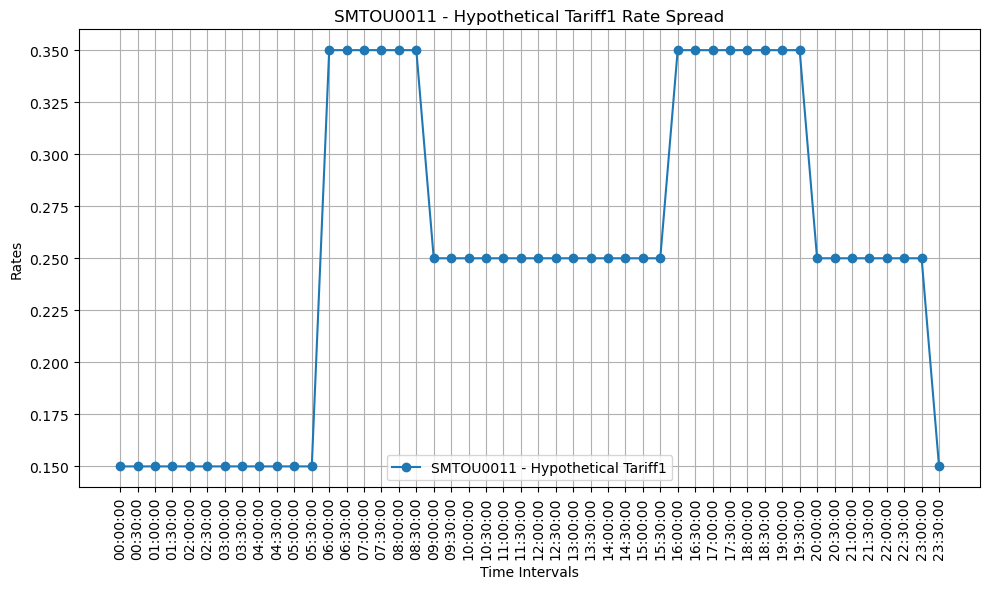

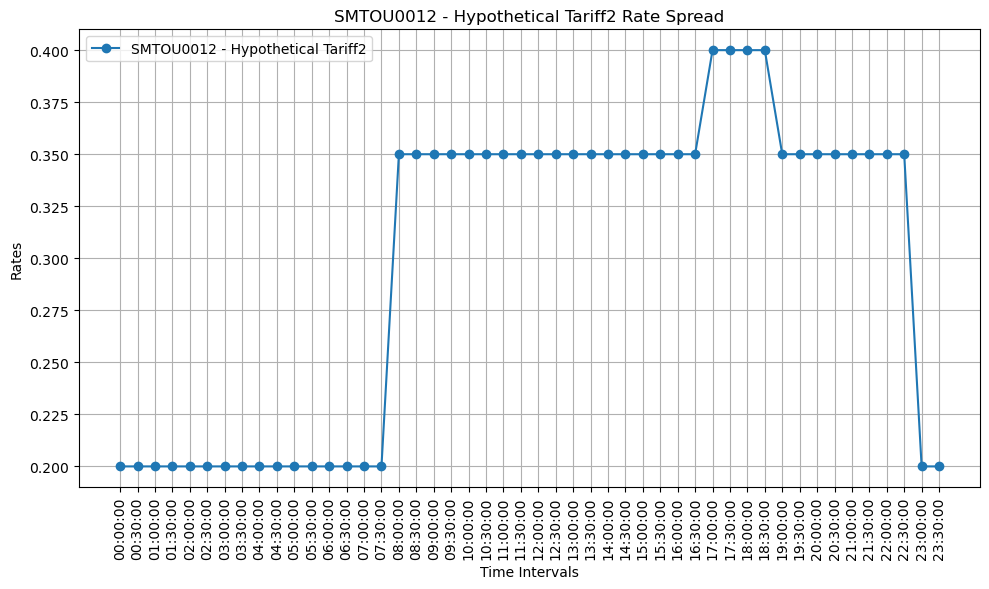

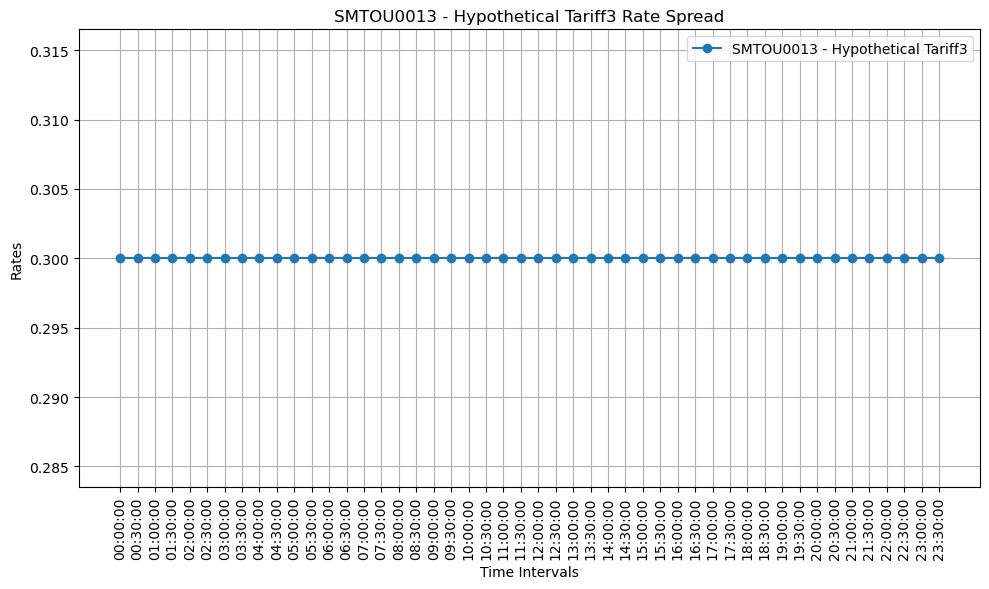

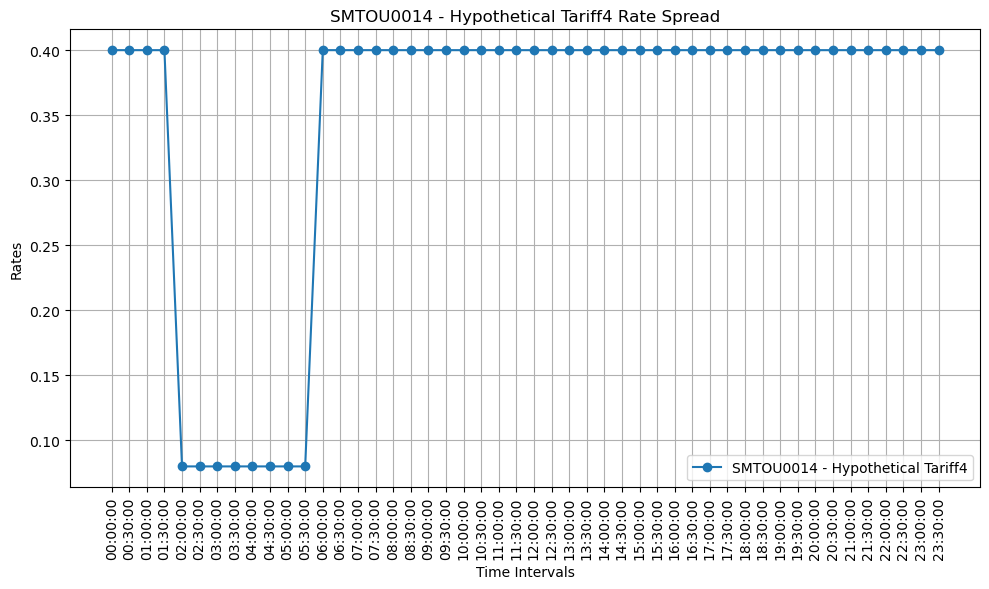

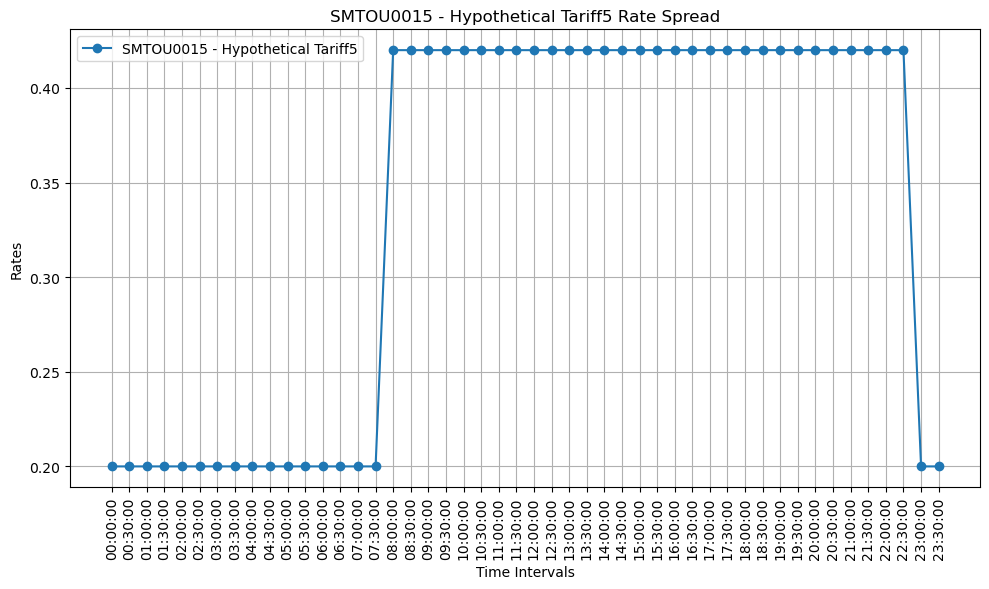

In [147]:
# Ensure that the column names are strings
tariffrate.columns = tariffrate.columns.astype(str)

# Plotting each tariff separately
for index, row in tariffrate.iterrows():
    tariff_name = row[0]
    plt.figure(figsize=(10, 6))
    plt.plot(row.index[1:], row[1:], marker='o', label=tariff_name)
    plt.title(f'{tariff_name} Rate Spread')
    plt.xlabel('Time Intervals')
    plt.ylabel('Rates')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [148]:
# # Set the 'Tariff' column as the index
# tariffrate.set_index('Tariff', inplace=True)

# # Transpose the dataframe to have times as rows and tariffs as columns
# tariffrate_transposed = tariffrate.transpose()

# # Plotting all tariffs on the same graph with different colors
# plt.figure(figsize=(12, 8))
# for column in tariffrate_transposed.columns:
#     plt.plot(tariffrate_transposed.index, tariffrate_transposed[column], marker='o', label=column)

# plt.title('Tariff Rate Spread')
# plt.xlabel('Time Intervals')
# plt.ylabel('Rates')
# plt.xticks(rotation=90)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [149]:
consumption_summed.head()

,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
AnonymisedMPRN,,,,,,,,,,,,,,,,,,,,,
10039345597,52.6885,60.4315,38.8690,27.2830,13.3880,4.4615,1.8565,1.8650,1.5130,1.6155,...,8.5090,11.065,12.1665,11.3525,9.6215,9.4635,12.1895,10.5155,22.9935,37.4415
10039346713,7.0970,6.1720,5.5640,5.2035,4.6575,4.4665,4.4410,4.2195,3.9315,3.6330,...,20.1665,27.117,22.7135,15.7485,13.6530,11.2095,11.2240,9.6630,8.2285,7.1190
10039653422,2.8330,3.2420,3.5750,3.5250,3.1160,3.3910,3.3380,3.3330,3.1340,3.6540,...,4.6750,4.465,3.1900,3.8910,3.4620,7.2960,6.0910,3.6560,3.3620,3.1080
10039742582,1.2885,1.2620,1.2695,3.5660,119.4785,104.3480,70.5680,45.0890,31.2000,28.1385,...,2.4190,1.483,1.6040,2.3625,3.2475,1.9615,1.7505,1.5265,1.3640,2.8630
10039745168,2.6705,1.9230,1.3100,1.3740,1.2450,1.2590,1.2335,1.2065,1.2285,1.2010,...,3.8010,3.142,4.7765,4.4775,5.3570,7.2290,7.6030,6.7235,5.0340,3.8235


In [150]:
consumption.head()

,AnonymisedMPRN,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
189623,10039345597,0.1990,2.1035,3.6705,3.6295,3.6060,1.221,0.2115,0.0405,0.0430,...,0.5645,0.2005,0.8000,0.8360,0.3300,0.2745,0.2470,0.2160,0.1935,3.2070
189624,10039345597,2.3175,3.6695,3.6485,1.9750,0.2550,0.070,0.0355,0.0355,0.0490,...,0.3160,0.2930,0.3095,0.2980,0.3435,0.3805,0.2440,0.2245,0.2075,0.2235
189625,10039345597,3.5440,3.8125,3.6915,3.2670,0.7600,0.465,0.0515,0.0330,0.0385,...,0.5595,0.7285,0.5010,0.4615,0.6085,0.3050,0.1675,0.1765,0.5400,3.5095
189626,10039345597,3.6715,3.6755,1.3130,0.1725,0.0570,0.061,0.0405,0.0385,0.0320,...,0.2695,0.6535,0.4400,0.1940,0.1315,0.5420,3.6115,3.6620,3.6845,2.6700
189627,10039345597,0.3405,0.0380,0.0730,0.0410,0.0385,0.047,0.0955,0.4255,0.0690,...,0.1430,0.1035,0.0750,0.0765,0.0810,0.0955,0.0980,0.0820,0.0910,0.0770


In [151]:
# Ensure that the column names are strings
consumption_summed.columns = consumption_summed.columns.astype(str)

# Define the simulation function for each tariff with user inputs
def simulate_tariff(consumption_summed, rates, limit, excess_multiplier):
    total_cost = pd.Series(0, index=consumption_summed.index)
    for column in consumption_summed.columns:
        if ':' in column:
            rate = rates[column]
            usage = consumption_summed[column]
            normal_usage = usage.apply(lambda x: min(x, limit))
            extra_usage = usage.apply(lambda x: max(x - limit, 0))
            total_cost += normal_usage * rate + extra_usage * rate * excess_multiplier
            
    return total_cost

# Extract rates for each tariff from newtariffs DataFrame
tariffs = {
    'Tariff1': {
        'rates': tariffrate.loc[0, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff2': {
        'rates': tariffrate.loc[1, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff3': {
        'rates': tariffrate.loc[2, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff4': {
        'rates': tariffrate.loc[3, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff5': {
        'rates': tariffrate.loc[4, tariffrate.columns[1:]].to_dict(),
    }
}

# Function to run the simulation with user input
def run_simulation():
    # Prompt the user to select a tariff
    print("Available Tariffs:")
    for i, tariff_name in enumerate(tariffs.keys(), start=1):
        print(f"{i}: {tariff_name}")
    
    tariff_choice = int(input("Enter the number corresponding to the tariff you want: ")) - 1
    tariff_name = list(tariffs.keys())[tariff_choice]

    # Prompt the user to enter the limit and excess multiplier
    limit = float(input("Enter the limit value (kWh): "))
    excess_multiplier = float(input("Enter the excess multiplier: "))

    rates = tariffs[tariff_name]['rates']
    result = simulate_tariff(consumption_summed, rates, limit, excess_multiplier)
    
    # Save the result to Excel
    result.to_excel(f'simulation_result_{tariff_name}.xlsx', index=True)
    print(f"Simulation result for {tariff_name} written to 'simulation_result_{tariff_name}.xlsx'")
    return result

# Run the simulation with user prompts
run_simulation()


Available Tariffs:
1: Tariff1
2: Tariff2
3: Tariff3
4: Tariff4
5: Tariff5
Enter the number corresponding to the tariff you want: 3
Enter the limit value (kWh): 11
Enter the excess multiplier: 1.4
Simulation result for Tariff3 written to 'simulation_result_Tariff3.xlsx'


AnonymisedMPRN
10039345597    184.95567
10039346713    234.39348
10039653422     50.81820
10039742582    188.95911
10039745168     40.16475
                 ...    
10303304469     75.96393
10303305562     71.55477
10303305582    371.38557
10303305829    241.50420
10303306996    236.82132
Length: 43492, dtype: float64

## Step by Step simulation with visualisation

### Define the simulation function

In [153]:
def simulate_tariff(consumption_summed, rates, limit, excess_multiplier):
    total_cost = pd.Series(0, index=consumption_summed.index)
    
    for column in consumption_summed.columns:
        if ':' in column:  # Check if the column name is a time period
            rate = rates[column]
            usage = consumption_summed[column]
            normal_usage = usage.apply(lambda x: min(x, limit))
            extra_usage = usage.apply(lambda x: max(x - limit, 0))
            total_cost += normal_usage * rate + extra_usage * rate * excess_multiplier

    return total_cost


### Set up the Tariff Data 

In [154]:
tariffs = {
    'Tariff1': {
        'rates': tariffrate.loc[0, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff2': {
        'rates': tariffrate.loc[1, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff3': {
        'rates': tariffrate.loc[2, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff4': {
        'rates': tariffrate.loc[3, tariffrate.columns[1:]].to_dict(),
    },
    'Tariff5': {
        'rates': tariffrate.loc[4, tariffrate.columns[1:]].to_dict(),
    }
}


### Compare the results

In [155]:
def compare_with_original(total_daily_usage, simulated_cost):
    # Ensure the index is set to 'AnonymisedMPRN' for both DataFrames
    original_usage = total_daily_usage.set_index('AnonymisedMPRN')
    
    # Create a DataFrame for comparison
    comparison = pd.DataFrame({
        'Original Usage': original_usage['Daily Usage'],
        'Simulated Cost': simulated_cost
    })
    
    # Calculate the difference and percentage difference
    comparison['Difference'] = comparison['Simulated Cost'] - comparison['Original Usage']
    comparison['Percent Difference'] = (comparison['Difference'] / comparison['Original Usage']) * 100
    
    return comparison


### Save and read Simulation results 

In [156]:
def save_results(result, tariff_name, output_format='excel'):
    if output_format in ['excel', 'both']:
        result.to_excel(f'simulation_result_{tariff_name}.xlsx', index=True)
        print(f"Simulation result for {tariff_name} written to 'simulation_result_{tariff_name}.xlsx'")
    
    if output_format in ['csv', 'both']:
        result.to_csv(f'simulation_result_{tariff_name}.csv', index=True)
        print(f"Simulation result for {tariff_name} written to 'simulation_result_{tariff_name}.csv'")


### Visualize the comparison 

In [157]:
def visualize_comparison(comparison, tariff_name):
    plt.figure(figsize=(14, 7))
    
    # Plot Original Usage vs Simulated Cost
    plt.subplot(2, 1, 1)
    comparison[['Original Usage', 'Simulated Cost']].plot(kind='bar', color=['skyblue', 'orange'], ax=plt.gca())
    plt.title(f'Original Usage vs Simulated Cost for {tariff_name}')
    plt.ylabel('kWh / Cost')
    plt.xticks(rotation=45)
    
    # Plot percentage difference
    plt.subplot(2, 1, 2)
    comparison['Percent Difference'].plot(kind='bar', color='green', ax=plt.gca())
    plt.title(f'Percentage Difference in Usage vs Cost for {tariff_name}')
    plt.ylabel('Percentage Difference (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

### Run the Simulation with user prompts 

Available Tariffs:
1: Tariff1
2: Tariff2
3: Tariff3
4: Tariff4
5: Tariff5
Enter the number corresponding to the tariff you want: 2
Enter the limit value (kWh): 9
Enter the excess multiplier: 1.35
Simulation result for Tariff2 written to 'simulation_result_Tariff2.xlsx'
Simulation result for Tariff2 written to 'simulation_result_Tariff2.csv'


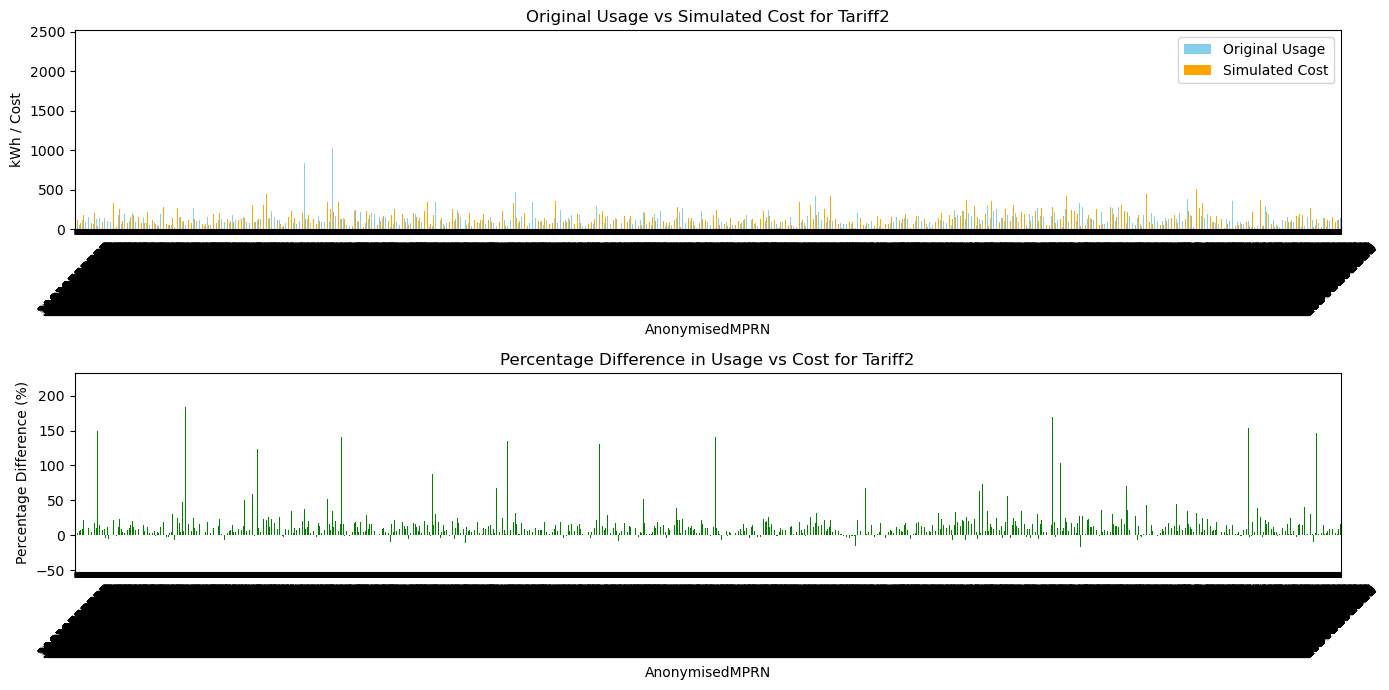

,Original Usage,Simulated Cost,Difference,Percent Difference
AnonymisedMPRN,,,,
10039345597,131.814151,165.394320,33.580169,25.475390
10039346713,218.605969,264.854835,46.248866,21.156268
10039653422,48.192459,50.079950,1.887491,3.916568
10039742582,54.060766,128.867935,74.807169,138.376078
10039745168,43.142506,42.632300,-0.510206,-1.182605
...,...,...,...,...
10303304469,82.128486,85.877576,3.749090,4.564909
10303305562,77.491091,80.985360,3.494269,4.509253
10303305582,297.223091,376.382441,79.159351,26.632975


In [158]:
def run_simulation():
    # Prompt the user to select a tariff
    print("Available Tariffs:")
    for i, tariff_name in enumerate(tariffs.keys(), start=1):
        print(f"{i}: {tariff_name}")
    
    tariff_choice = int(input("Enter the number corresponding to the tariff you want: ")) - 1
    tariff_name = list(tariffs.keys())[tariff_choice]

    # Prompt the user to enter the limit and excess multiplier
    limit = float(input("Enter the limit value (kWh): "))
    excess_multiplier = float(input("Enter the excess multiplier: "))

    rates = tariffs[tariff_name]['rates']
    simulated_cost = simulate_tariff(consumption_summed, rates, limit, excess_multiplier)
    
    # Compare with original usage
    comparison = compare_with_original(total_daily_usage, simulated_cost)
    
    # Save the comparison results
    save_results(comparison, tariff_name, 'both')
    
    # Visualize the comparison
    visualize_comparison(comparison, tariff_name)

    return comparison

# Run the simulation with user prompts
run_simulation()
    